# Data understanding and Preparation 

In [1]:
#Import the required Libraries.
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading & Datatypes

In [2]:
#Read the data in pandas
app = pd.read_csv("application_data.csv")
histo = pd.read_csv("previous_application.csv")

In [3]:
#reading each column datatype
app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Handling Null Values

In [4]:
#Identify null value columns from the data
nullcol = app.isnull().sum()
(app.isnull().sum()/len(app)*100)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [5]:
#identifying columns with null value >40% from application data
nullcol=nullcol[nullcol.values>(40/100*len(app))]
print(f"{len(nullcol)} out of {len(app.columns)} columns contain null values >40% from application data")

49 out of 122 columns contain null values >40% from application data


In [6]:
# listing the null values columns having more than 40% from History data

histcol=histo.isnull().sum()
histcol=histcol[histcol.values>(0.4*len(histo))]
print(f"{len(histcol)} out of {len(histo.columns)} columns contain null values >40% from history data")

11 out of 37 columns contain null values >40% from history data


In [7]:
#dropping those null columns from the original data set
#len(applications.drop((list(nullcolumns.index)),axis=1).columns)
app.drop((list(nullcol.index)),axis=1,inplace=True)


In [8]:
# Removing those 11 columns from history data

histcol = list(histcol[histcol.values>=0.4].index)
histo.drop(labels=histcol,axis=1,inplace=True)
histo=histo.drop(histo[histo['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
histo=histo.drop(histo[histo['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
histo.shape

(69635, 26)

In [9]:
# Checking the columns for null values from app 
(histo.isnull().sum()/len(histo)*100).sort_values(ascending =False)

AMT_ANNUITY                    0.377684
CNT_PAYMENT                    0.377684
SK_ID_PREV                     0.000000
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
DAYS_DECISION                  0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_CREDIT                     0.000000
AMT_APPLICATION                0.000000
NAME_CONTRACT_TYPE             0.000000


In [10]:
# Checking the columns for null values from app 
(app.isnull().sum()/len(app)*100).sort_values(ascending =False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

In [11]:
#checking the percentage of null value columns
rnull = (app.isnull().sum()/len(app)*100).sort_values(ascending = False)
rnull[rnull>0.0]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [12]:
#observing null columns one by one by keeping outliers in mind and filling them with median and mode
app.loc[app['DAYS_LAST_PHONE_CHANGE'].isnull() ,"DAYS_LAST_PHONE_CHANGE" ]=app['DAYS_LAST_PHONE_CHANGE'].mode()[0]
app.loc[app['CNT_FAM_MEMBERS'].isnull() ,"CNT_FAM_MEMBERS" ]=app['CNT_FAM_MEMBERS'].median()
app.loc[app['AMT_GOODS_PRICE'].isnull() ,"AMT_GOODS_PRICE" ]=app['AMT_GOODS_PRICE'].median()
app.loc[app['EXT_SOURCE_2'].isnull() ,"EXT_SOURCE_2" ]=app['EXT_SOURCE_2'].median()
app.loc[app['EXT_SOURCE_3'].isnull() ,"EXT_SOURCE_3" ]=app['EXT_SOURCE_3'].median()
app.loc[app['DEF_60_CNT_SOCIAL_CIRCLE'].isnull() ,"DEF_60_CNT_SOCIAL_CIRCLE" ]=app['DEF_60_CNT_SOCIAL_CIRCLE'].median()
app.loc[app['OBS_60_CNT_SOCIAL_CIRCLE'].isnull() ,"OBS_60_CNT_SOCIAL_CIRCLE" ]=app['OBS_60_CNT_SOCIAL_CIRCLE'].median()
app.loc[app['DEF_30_CNT_SOCIAL_CIRCLE'].isnull() ,"DEF_30_CNT_SOCIAL_CIRCLE" ]=app['DEF_30_CNT_SOCIAL_CIRCLE'].median()
app.loc[app['OBS_30_CNT_SOCIAL_CIRCLE'].isnull() ,"OBS_30_CNT_SOCIAL_CIRCLE" ]=app['OBS_30_CNT_SOCIAL_CIRCLE'].median()
app.loc[app['NAME_TYPE_SUITE'].isnull() ,"NAME_TYPE_SUITE" ]=app['NAME_TYPE_SUITE'].mode()[0]
app.loc[app['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull() ,"AMT_REQ_CREDIT_BUREAU_HOUR" ]=app['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
app.loc[app['AMT_REQ_CREDIT_BUREAU_DAY'].isnull() ,"AMT_REQ_CREDIT_BUREAU_DAY" ]=app['AMT_REQ_CREDIT_BUREAU_DAY'].median()
app.loc[app['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull() ,"AMT_REQ_CREDIT_BUREAU_WEEK" ]=app['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
app.loc[app['AMT_REQ_CREDIT_BUREAU_MON'].isnull() ,"AMT_REQ_CREDIT_BUREAU_MON" ]=app['AMT_REQ_CREDIT_BUREAU_MON'].median()
app.loc[app['AMT_REQ_CREDIT_BUREAU_QRT'].isnull() ,"AMT_REQ_CREDIT_BUREAU_QRT" ]=app['AMT_REQ_CREDIT_BUREAU_QRT'].median()
app.loc[app['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull() ,"AMT_REQ_CREDIT_BUREAU_YEAR" ]=app['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
app.loc[app['AMT_ANNUITY'].isnull() ,"AMT_ANNUITY" ]=app['AMT_ANNUITY'].median()

In [13]:
#checking the percentage of null value columns
rnull = (app.isnull().sum()/len(app)*100).sort_values(ascending = False)
rnull[rnull>0.0]
#occupation type column can contain different occupation so we can not fill it with any random value or mode value

OCCUPATION_TYPE    31.345545
dtype: float64

### Data transformation

In [14]:
#verify each remaining columns one by one for incorrect data manipulation 
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

#### Fixing the Rows and Columns 

In [15]:
#verifiying columns apart from recently filled by above median and mode values
app.TARGET.value_counts()
app.NAME_CONTRACT_TYPE.value_counts()
app.CNT_CHILDREN.value_counts()
app.NAME_TYPE_SUITE.value_counts()
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [16]:
#fixing columns CODE_GENDER with XNA values with mode of column
app.loc[app['CODE_GENDER'] == "XNA" ,"CODE_GENDER" ]=app['CODE_GENDER'].mode()[0]

In [17]:
app.DAYS_BIRTH.value_counts()
app.DAYS_EMPLOYED.value_counts()
app.DAYS_REGISTRATION.value_counts()
app.DAYS_ID_PUBLISH.value_counts()
app.DAYS_LAST_PHONE_CHANGE.value_counts()
#Days birth contain negative values which should be converted into positive abs
app['DAYS_BIRTH'] = app.DAYS_BIRTH.apply(lambda x:abs(x))
app['DAYS_EMPLOYED'] = app.DAYS_EMPLOYED.apply(lambda x:abs(x))
app['DAYS_REGISTRATION'] = app.DAYS_REGISTRATION.apply(lambda x:abs(x))
app['DAYS_ID_PUBLISH'] = app.DAYS_ID_PUBLISH.apply(lambda x:abs(x))
app['DAYS_LAST_PHONE_CHANGE'] = app.DAYS_LAST_PHONE_CHANGE.apply(lambda x:abs(x))


In [18]:
# we can convert days into year to get the age of person
app['DAYS_BIRTH']= (app['DAYS_BIRTH']/365).astype("int")

In [19]:
#verifying counts
app.FLAG_OWN_CAR.value_counts()
app.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [20]:
#lets convert  flag columns into 1 and 0 , Y=1 N=0 like other flag columns such as FLAG_DOCUMENT_2
app['FLAG_OWN_CAR'] = app['FLAG_OWN_CAR'].apply(lambda x: 1 if x=="Y" else 0)
app['FLAG_OWN_REALTY'] = app['FLAG_OWN_REALTY'].apply(lambda x: 1 if x=="Y" else 0)


In [21]:
#verifying counts again
app.FLAG_OWN_REALTY.value_counts()
app.FLAG_OWN_REALTY.value_counts()

1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [22]:
#procedding with next columns
app.REG_CITY_NOT_WORK_CITY.value_counts()
app.LIVE_CITY_NOT_WORK_CITY.value_counts()
app.WEEKDAY_APPR_PROCESS_START.value_counts()
app.HOUR_APPR_PROCESS_START.value_counts()
app.ORGANIZATION_TYPE.value_counts()


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [23]:
#fixing columns ORGANIZATION_TYPE with XNA values by replacing it with values related with Pensioner
#all the Pensioner we have those null values for OCCUPATION_TYPE so we can fill them with Pensioner or Retired 
app.loc[app.ORGANIZATION_TYPE == "XNA"][["ORGANIZATION_TYPE","NAME_INCOME_TYPE","OCCUPATION_TYPE"]]

,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE
8,XNA,Pensioner,NaN
11,XNA,Pensioner,NaN
23,XNA,Pensioner,NaN
38,XNA,Pensioner,NaN
43,XNA,Pensioner,NaN
...,...,...,...
307469,XNA,Pensioner,NaN
307483,XNA,Pensioner,NaN
307487,XNA,Pensioner,NaN
307505,XNA,Pensioner,NaN


In [24]:
#fixing nan and XNA values
app.loc[app.ORGANIZATION_TYPE == "XNA","ORGANIZATION_TYPE"]="Pensioner"
app.loc[app.OCCUPATION_TYPE.isna(),"OCCUPATION_TYPE"]="Pensioner"

In [25]:
#convert app['DAYS_BIRTH'] column into age category
app["AGE"]=pd.cut(app['DAYS_BIRTH'],bins=[19,25,35,60,100],labels=["Very_young","Young","Middle_Age","Senior_Citizen"])

In [26]:
#AMT_INCOME_TOTAL and AMT_CREDIT into buckets
app["AMT_INCOME_TOTAL"].describe()
app["AMT_INCOME_GROUP"]=pd.qcut(app["AMT_INCOME_TOTAL"],q=[0,0.25,0.50,0.75,0.95,1],labels=["Very_low","Low","Medium","High","Very_High"])
app["AMT_CREDIT_GROUP"]=pd.qcut(app["AMT_CREDIT"],q=[0,0.25,0.50,0.75,0.95,1],labels=["Very_low","Low","Medium","High","Very_High"])

In [27]:
#verifying count of each group
app["AMT_CREDIT_GROUP"].value_counts()

Very_low     78421
Medium       77786
Low          75428
High         61842
Very_High    14034
Name: AMT_CREDIT_GROUP, dtype: int64

In [28]:
#lets drop the columns which are not required for analysis
dropcolumn=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app.drop(labels=dropcolumn,axis=1,inplace=True)

In [29]:
#verifying final shape of dataframe
app.shape

(307511, 48)

In [30]:
#verifying datatypes of dataframe
app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                      int64
FLAG_OWN_REALTY                   int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int32
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64


In [31]:
#below columns holds categorial data so changing data types to category
app['NAME_CONTRACT_TYPE'] = app['NAME_CONTRACT_TYPE'].astype('category')
app['CODE_GENDER'] = app['CODE_GENDER'].astype('category')
app['NAME_TYPE_SUITE'] = app['NAME_TYPE_SUITE'].astype('category')
app['OCCUPATION_TYPE'] = app['OCCUPATION_TYPE'].astype('category')
app['WEEKDAY_APPR_PROCESS_START'] = app['WEEKDAY_APPR_PROCESS_START'].astype('category')
app['ORGANIZATION_TYPE'] = app['ORGANIZATION_TYPE'].astype('category')
app['NAME_INCOME_TYPE'] = app['NAME_INCOME_TYPE'].astype('category')
app['NAME_EDUCATION_TYPE'] = app['NAME_EDUCATION_TYPE'].astype('category')
app['NAME_FAMILY_STATUS'] = app['NAME_FAMILY_STATUS'].astype('category')
app['NAME_HOUSING_TYPE'] = app['NAME_HOUSING_TYPE'].astype('category')

In [32]:
#verifying datatypes of dataframe again
app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                      int64
FLAG_OWN_REALTY                   int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int32
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OCCUPATION_TYPE                category
CNT_FAM_MEMBERS                 float64
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START           int64


### Outliers Understanding


In [33]:
#let's verify number columns for outlier verification
app.select_dtypes(include='number').columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

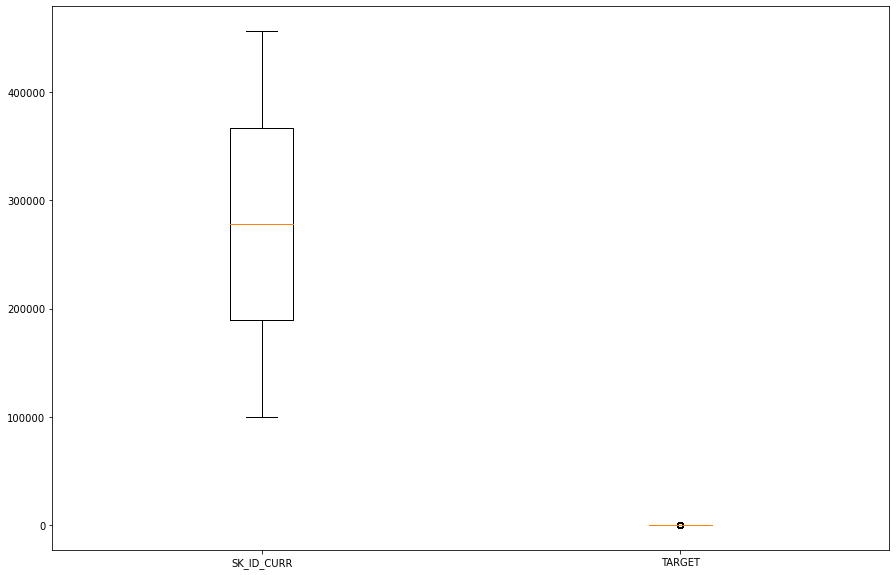

In [34]:
#Target columns only has 0 abd 1 value 
#No outliers in below
plt.figure(figsize=[15,10])
plt.boxplot([app['SK_ID_CURR'],app['TARGET']])
plt.xticks([1,2],["SK_ID_CURR","TARGET"])
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_CHILDREN'>

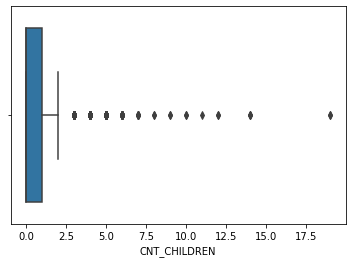

In [35]:
sns.boxplot(app['CNT_CHILDREN'])

### Observation
#### CNT_CHILDREN  column has an outlier, some applicant with count of children's more than 5 which is consider as outlier



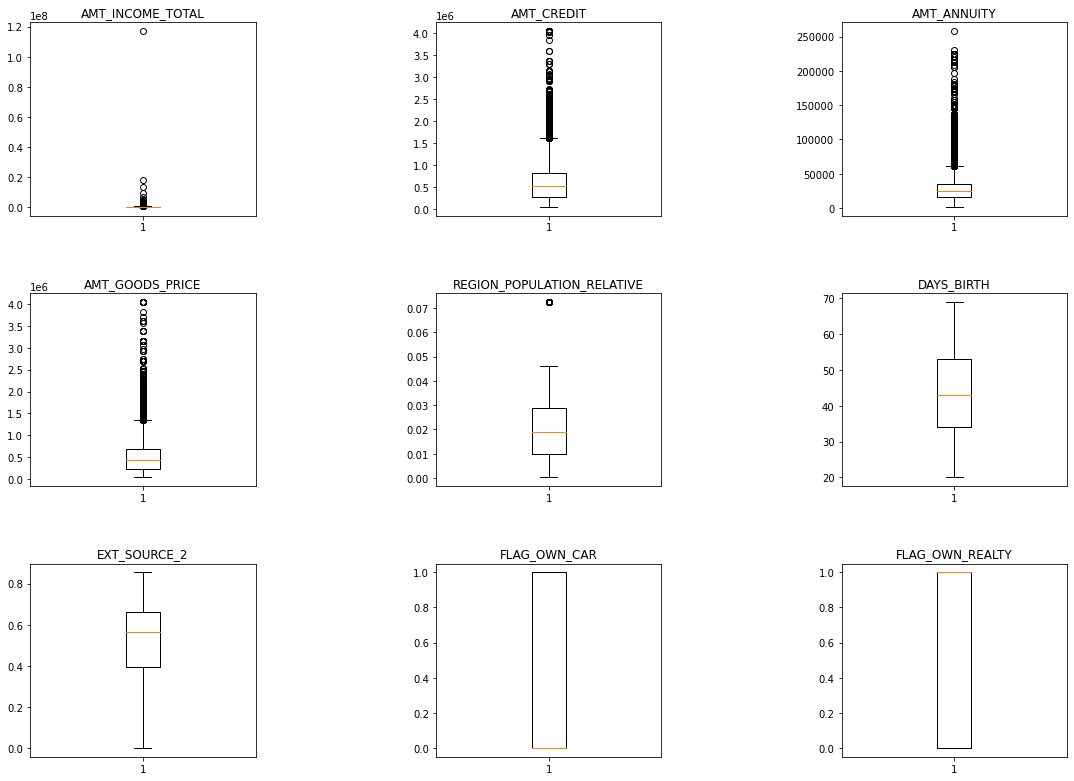

In [36]:
fig, axs = plt.subplots(3, 3, figsize=(16,12))
# basic plot

axs[0, 0].boxplot(app['AMT_INCOME_TOTAL'])
axs[0, 0].set_title('AMT_INCOME_TOTAL')

axs[0, 1].boxplot(app['AMT_CREDIT'])
axs[0, 1].set_title('AMT_CREDIT')

axs[0, 2].boxplot(app['AMT_ANNUITY'])
axs[0, 2].set_title('AMT_ANNUITY')

axs[1, 0].boxplot(app['AMT_GOODS_PRICE'])
axs[1, 0].set_title('AMT_GOODS_PRICE')


axs[1, 1].boxplot(app['REGION_POPULATION_RELATIVE'])
axs[1, 1].set_title('REGION_POPULATION_RELATIVE')


axs[1, 2].boxplot(app['DAYS_BIRTH'])
axs[1, 2].set_title('DAYS_BIRTH')

axs[2, 0].boxplot(app['EXT_SOURCE_2'])
axs[2, 0].set_title('EXT_SOURCE_2')


axs[2, 1].boxplot(app['FLAG_OWN_CAR'])
axs[2, 1].set_title('FLAG_OWN_CAR')


axs[2, 2].boxplot(app['FLAG_OWN_REALTY'])
axs[2, 2].set_title('FLAG_OWN_REALTY')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.8)

plt.show()

### Observation
#### AMT_INCOME_TOTAL, AMT_CREDIT ,AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE  has an outlier values

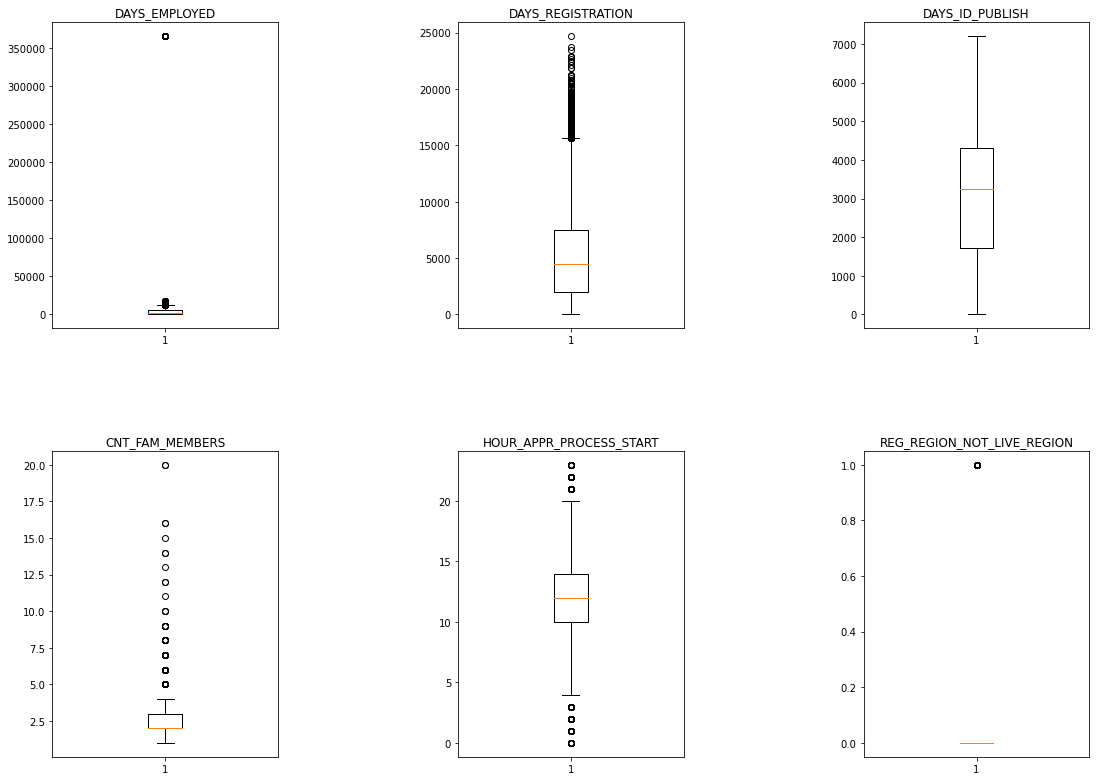

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(16,12))


axs[0, 0].boxplot(app['DAYS_EMPLOYED'])
axs[0, 0].set_title('DAYS_EMPLOYED')

axs[0, 1].boxplot(app['DAYS_REGISTRATION'])
axs[0, 1].set_title('DAYS_REGISTRATION')

axs[0, 2].boxplot(app['DAYS_ID_PUBLISH'])
axs[0, 2].set_title('DAYS_ID_PUBLISH')

axs[1, 0].boxplot(app['CNT_FAM_MEMBERS'])
axs[1, 0].set_title('CNT_FAM_MEMBERS')


axs[1, 1].boxplot(app['HOUR_APPR_PROCESS_START'])
axs[1, 1].set_title('HOUR_APPR_PROCESS_START')


axs[1, 2].boxplot(app['REG_REGION_NOT_LIVE_REGION'])
axs[1, 2].set_title('REG_REGION_NOT_LIVE_REGION')


fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.8)

plt.show()

#### FLAG_OWN_REALTY and FLAG_OWN_CAR doesn’t have First and Third quantile and values lies within IQR , we can conclude that  most of the clients own  a car and House
#### DAYS_EMPLOYED, DAYS_REGISTRATION, CNT_FAM_MEMBERS has an outlier values

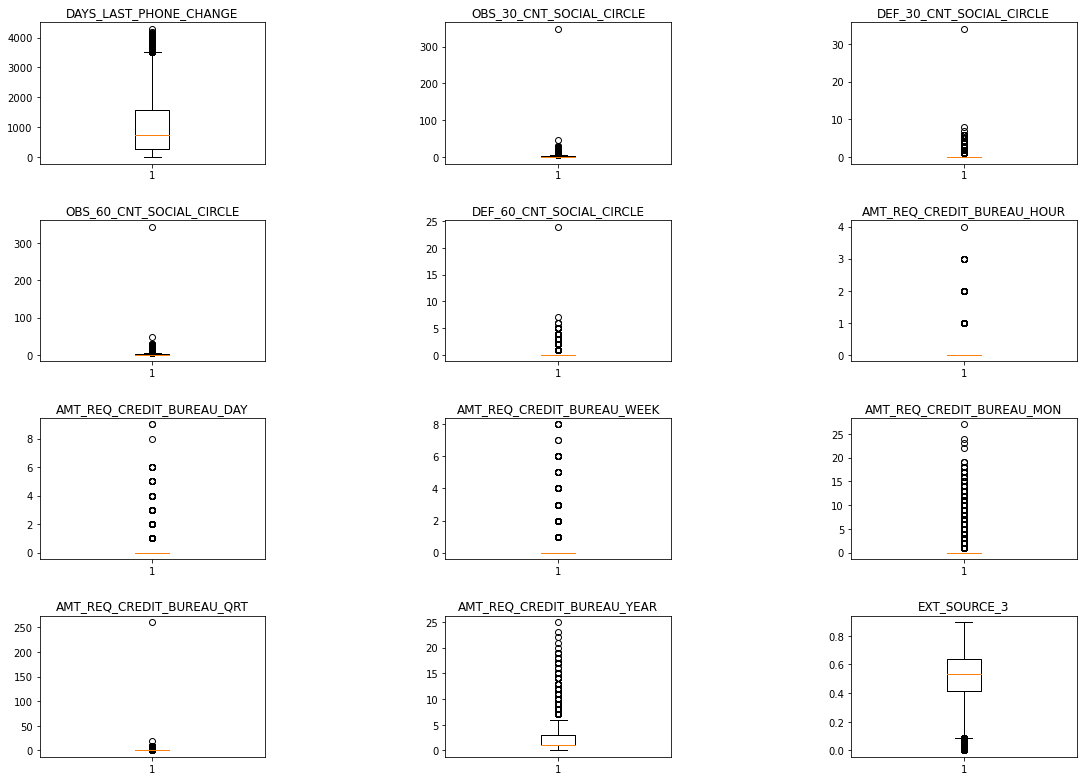

In [38]:
fig, axs = plt.subplots(4, 3, figsize=(16,12))


axs[0, 0].boxplot(app['DAYS_LAST_PHONE_CHANGE'])
axs[0, 0].set_title('DAYS_LAST_PHONE_CHANGE')

axs[0, 1].boxplot(app['OBS_30_CNT_SOCIAL_CIRCLE'])
axs[0, 1].set_title('OBS_30_CNT_SOCIAL_CIRCLE')

axs[0, 2].boxplot(app['DEF_30_CNT_SOCIAL_CIRCLE'])
axs[0, 2].set_title('DEF_30_CNT_SOCIAL_CIRCLE')

axs[1, 0].boxplot(app['OBS_60_CNT_SOCIAL_CIRCLE'])
axs[1, 0].set_title('OBS_60_CNT_SOCIAL_CIRCLE')

axs[1, 1].boxplot(app['DEF_60_CNT_SOCIAL_CIRCLE'])
axs[1, 1].set_title('DEF_60_CNT_SOCIAL_CIRCLE')

axs[1, 2].boxplot(app['AMT_REQ_CREDIT_BUREAU_HOUR'])
axs[1, 2].set_title('AMT_REQ_CREDIT_BUREAU_HOUR')

axs[2, 0].boxplot(app['AMT_REQ_CREDIT_BUREAU_DAY'])
axs[2, 0].set_title('AMT_REQ_CREDIT_BUREAU_DAY')

axs[2, 1].boxplot(app['AMT_REQ_CREDIT_BUREAU_WEEK'])
axs[2, 1].set_title('AMT_REQ_CREDIT_BUREAU_WEEK')

axs[2, 2].boxplot(app['AMT_REQ_CREDIT_BUREAU_MON'])
axs[2, 2].set_title('AMT_REQ_CREDIT_BUREAU_MON')

axs[3, 0].boxplot(app['AMT_REQ_CREDIT_BUREAU_QRT'])
axs[3, 0].set_title('AMT_REQ_CREDIT_BUREAU_QRT')

axs[3, 1].boxplot(app['AMT_REQ_CREDIT_BUREAU_YEAR'])
axs[3, 1].set_title('AMT_REQ_CREDIT_BUREAU_YEAR')

axs[3, 2].boxplot(app['EXT_SOURCE_3'])
axs[3, 2].set_title('EXT_SOURCE_3')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.8)

plt.show()

#### DAYS_LAST_PHONE_CHANGE  , DAYS_EMPLOYED ,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR  have a large number of outliers 


#### DAYS_BIRTH ,DAYS_ID_PUBLISH and EXT_SOURCE_2,EXT_SOURCE_3 don’t have any outliers. 

# DATA ANALYSIS

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
So we can divide the whole data into 2 parts, 1 with clients without payment difficulties and other with late payments 

In [39]:
#creating dummy column TargetCount to keep track on total number of clients for categorial analysis
app.loc[app["TARGET"]== 0,"TargetCount"] = 1
app.loc[app["TARGET"]== 1,"TargetCount"] = 1
Client0 =  app[app.TARGET== 0]
Client1 =  app[app.TARGET == 1]

In [40]:
#Calculate data imbalance
imbalnce = round(len(Client0)/len(Client1),2)
print(f"we have got data imblance =  {imbalnce}")

we have got data imblance =  11.39


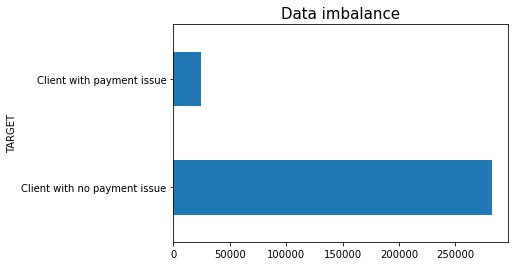

In [41]:
app.groupby("TARGET")["TargetCount"].sum().plot.barh()
plt.yticks([0,1],["Client with no payment issue","Client with payment issue"])
plt.title('Data imbalance',fontsize=15)
plt.show()

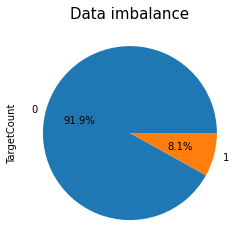

In [42]:
app.groupby("TARGET")["TargetCount"].sum().plot.pie(autopct='%1.1f%%')
plt.title('Data imbalance',fontsize=15)
plt.show()

### Observation

#### above application data is highly imbalanced.  Population with payment issue is 8.1 % and population without payment issue is 91.9% with Ratio 11.39

## Univariate,  Bivariate Analysis and Multivariate Analysis


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


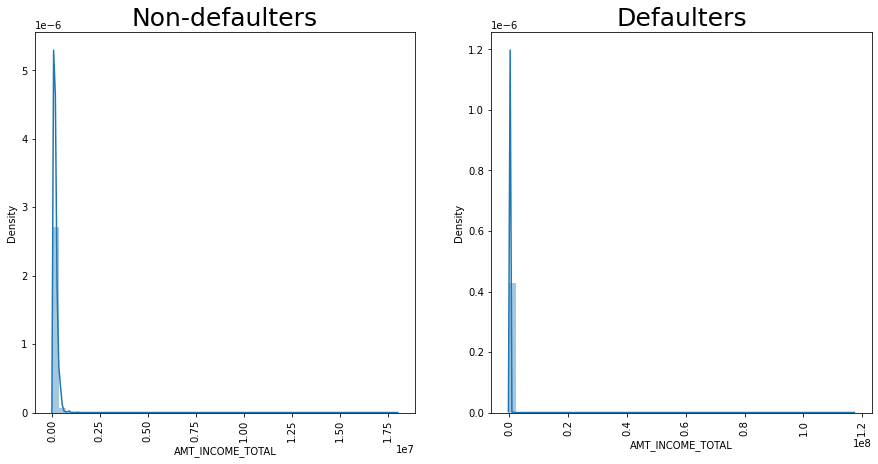

In [43]:
#Numerical Columns
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.distplot(Client0.AMT_INCOME_TOTAL)
plt.title("Non-defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.subplot(122)
sns.distplot(Client1.AMT_INCOME_TOTAL)
plt.title("Defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


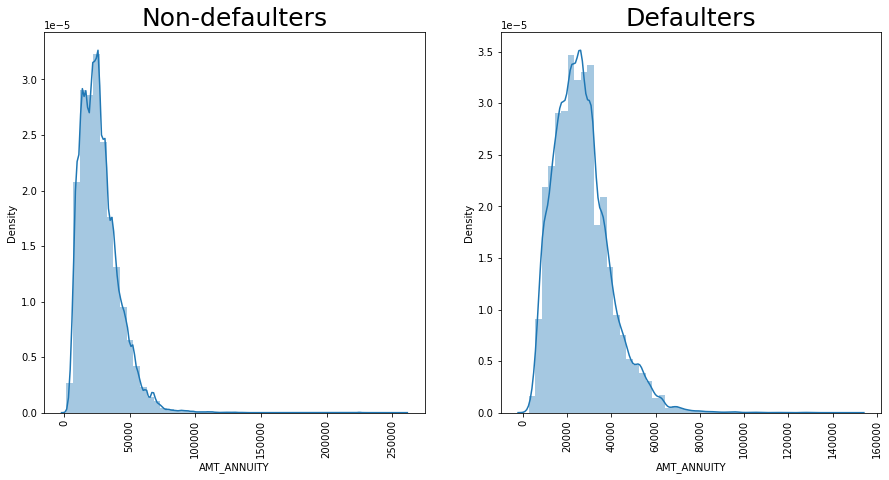

In [44]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.distplot(Client0.AMT_ANNUITY)
plt.title("Non-defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.subplot(122)
sns.distplot(Client1.AMT_ANNUITY)
plt.title("Defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


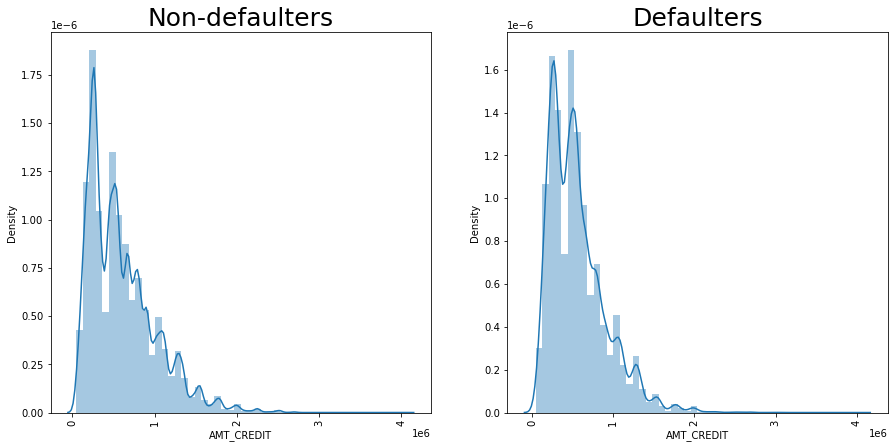

In [45]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.distplot(Client0.AMT_CREDIT)
plt.title("Non-defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.subplot(122)
sns.distplot(Client1.AMT_CREDIT)
plt.title("Defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


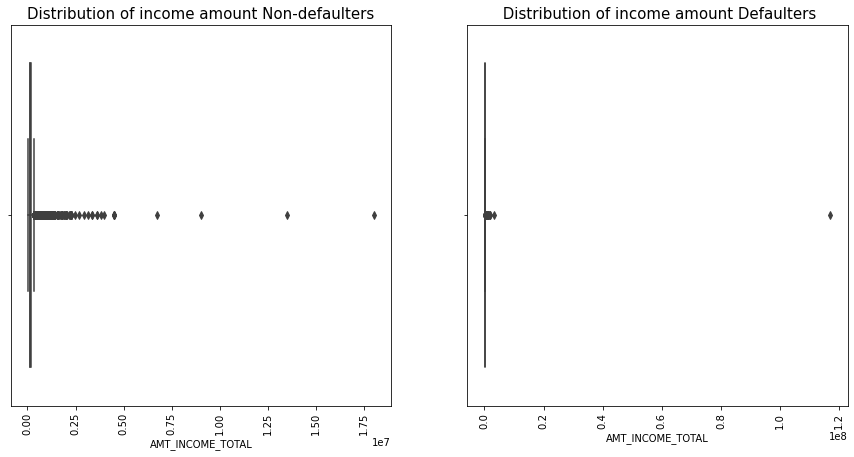

In [46]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.boxplot(Client0.AMT_INCOME_TOTAL)
plt.title("Distribution of income amount Non-defaulters",fontsize=15)
plt.xticks(rotation=90)
plt.subplot(122)
sns.boxplot(Client1.AMT_INCOME_TOTAL)
plt.title(" Distribution of income amount Defaulters",fontsize=15)
plt.xticks(rotation=90)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


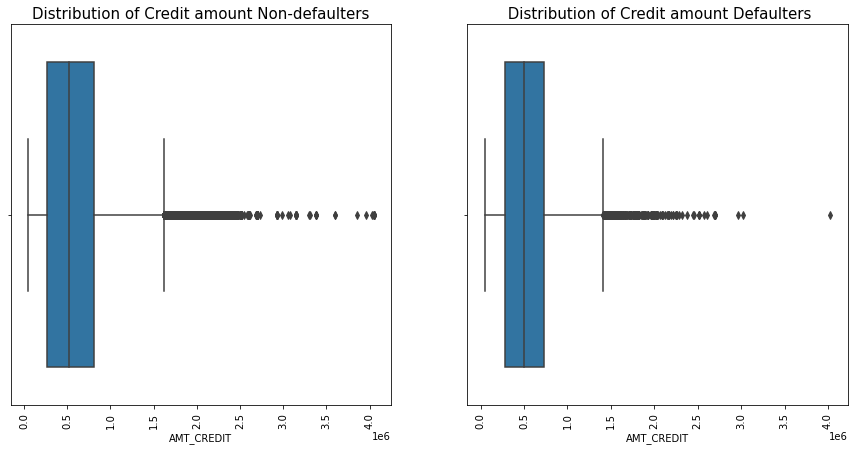

In [47]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.boxplot(Client0.AMT_CREDIT)
plt.title("Distribution of Credit amount Non-defaulters",fontsize=15)
plt.xticks(rotation=90)
plt.subplot(122)
sns.boxplot(Client1.AMT_CREDIT)
plt.title(" Distribution of Credit amount Defaulters",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [48]:
#let's find out category columns for analysis
app.select_dtypes(include='category').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'AGE', 'AMT_INCOME_GROUP', 'AMT_CREDIT_GROUP'],
      dtype='object')

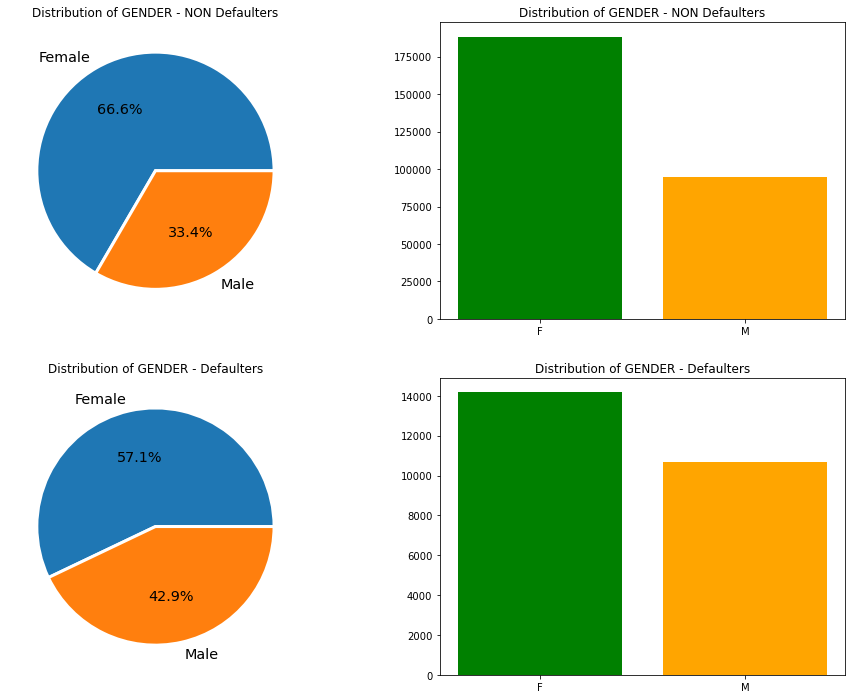

In [49]:
#plot a bar  and pie chart of Gender distribution over the loan client default status - 0,1
age0=Client0.groupby("CODE_GENDER")["TargetCount"].sum()

age1=Client1.groupby("CODE_GENDER")["TargetCount"].sum()


fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0, 0].pie(Client0.groupby("CODE_GENDER")["TargetCount"].sum(),autopct='%1.1f%%',labels=["Female","Male"],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
axs[0, 0].set_title('Distribution of GENDER - NON Defaulters')

axs[0, 1].bar(age0.index,age0.values,color=["Green","Orange"])
axs[0, 1].set_title('Distribution of GENDER - NON Defaulters')

axs[1, 0].pie(Client1.groupby("CODE_GENDER")["TargetCount"].sum(),autopct='%1.1f%%',labels=["Female","Male"],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
axs[1, 0].set_title('Distribution of GENDER - Defaulters')

axs[1, 1].bar(age1.index,age1.values,color=["Green","Orange"])
axs[1, 1].set_title('Distribution of GENDER - Defaulters')

plt.show()

### Observation

####  Female clients applied higher than male clients for loan

#### 66.6% Female clients are non-defaulters while 33.4% male clients are non-defaulters

####  57% Female clients are defaulters while 42% male clients are defaulters.

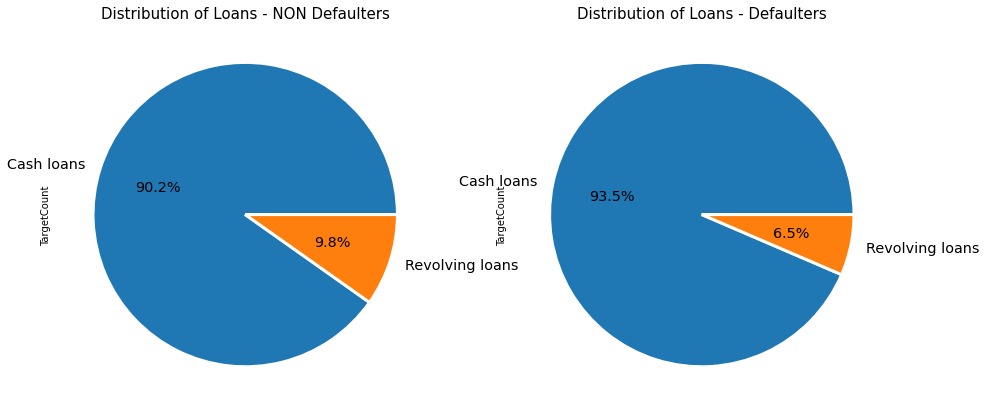

In [50]:
#plot a pie chart of loan type distribution with client status 0,1 
plt.figure(figsize=(15,7)) 
plt.subplot(121)
Client0.groupby("NAME_CONTRACT_TYPE")["TargetCount"].sum().plot.pie(autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.title('Distribution of Loans - NON Defaulters',fontsize=15)
plt.subplot(122)
Client1.groupby("NAME_CONTRACT_TYPE")["TargetCount"].sum().plot.pie(autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.title('Distribution of Loans - Defaulters',fontsize=15)
plt.show()

### Observation

#### Non Defaulters - 90.2% clients applied for cash loans  while 9.8 % clients applied for Revolving loans
#### Defaulters - 93.5% clients applied for cash loans  while 6.5 % clients applied for Revolving loans


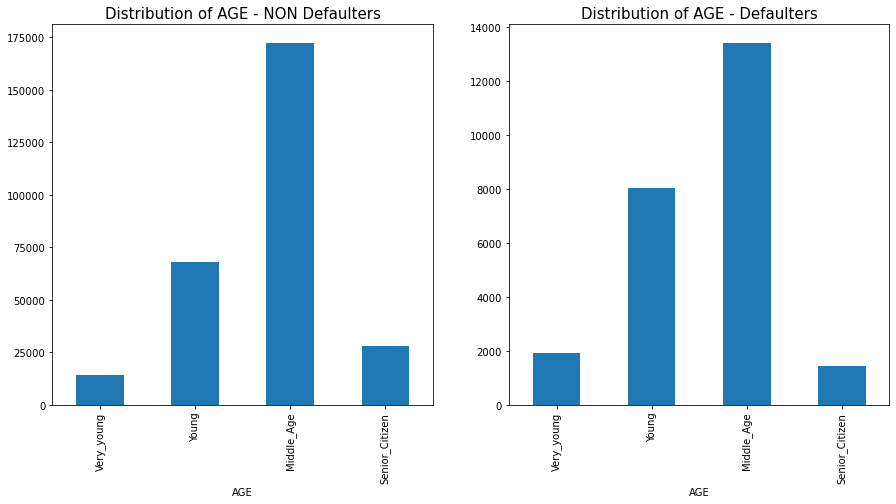

In [51]:
#plot a bar chart of NAME_EDUCATION_TYPE distribution over the loan client default status - 0 
plt.figure(figsize=(15,7)) 
plt.subplot(121)
Client0.groupby("AGE")["TargetCount"].sum().plot.bar()
plt.title('Distribution of AGE - NON Defaulters',fontsize=15)
plt.subplot(122)
Client1.groupby("AGE")["TargetCount"].sum().plot.bar()
plt.title('Distribution of AGE - Defaulters',fontsize=15)
plt.show()

### Observation

#### Middle age (35-60) clientsseems to be applied higher than any other age group in case if both defaulters and non defaulters

#### Middle age group having lot of paying difficulties but at the same time Very young (18-25) and senior citizens (60>) do not face payment issues

### Observation

#### Maximum cliend applied for loan with Secondary/ secondary special education


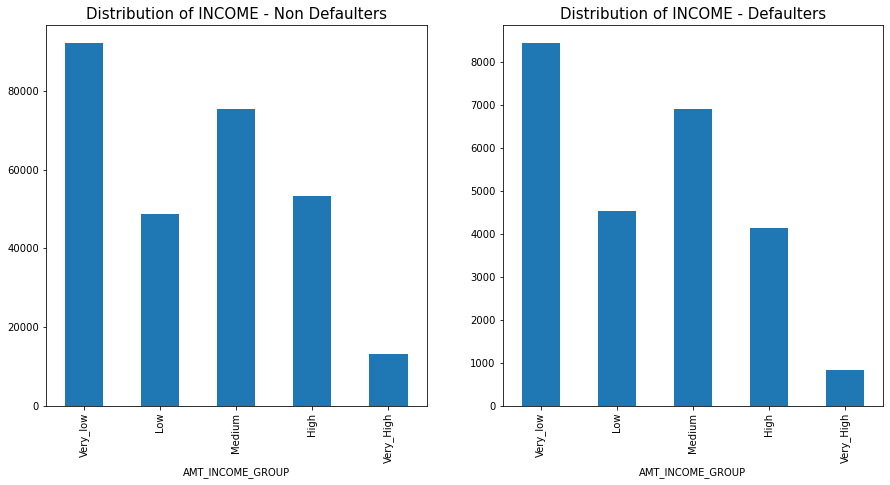

In [52]:
#plot a bar chart of AMT_INCOME_GROUP distribution over the loan client default status - 0 

plt.figure(figsize=(15,7)) 
plt.subplot(121)
Client0.groupby("AMT_INCOME_GROUP")["TargetCount"].sum().plot.bar()
plt.title('Distribution of INCOME - Non Defaulters',fontsize=15)
plt.subplot(122)
#plot a bar chart of AMT_INCOME_GROUP distribution over the loan client default status - 1
Client1.groupby("AMT_INCOME_GROUP")["TargetCount"].sum().plot.bar()
plt.title('Distribution of INCOME - Defaulters',fontsize=15)

plt.show()

### Observation

#### we have high number of clients with very low income in case of both defaulters and non defaulters.

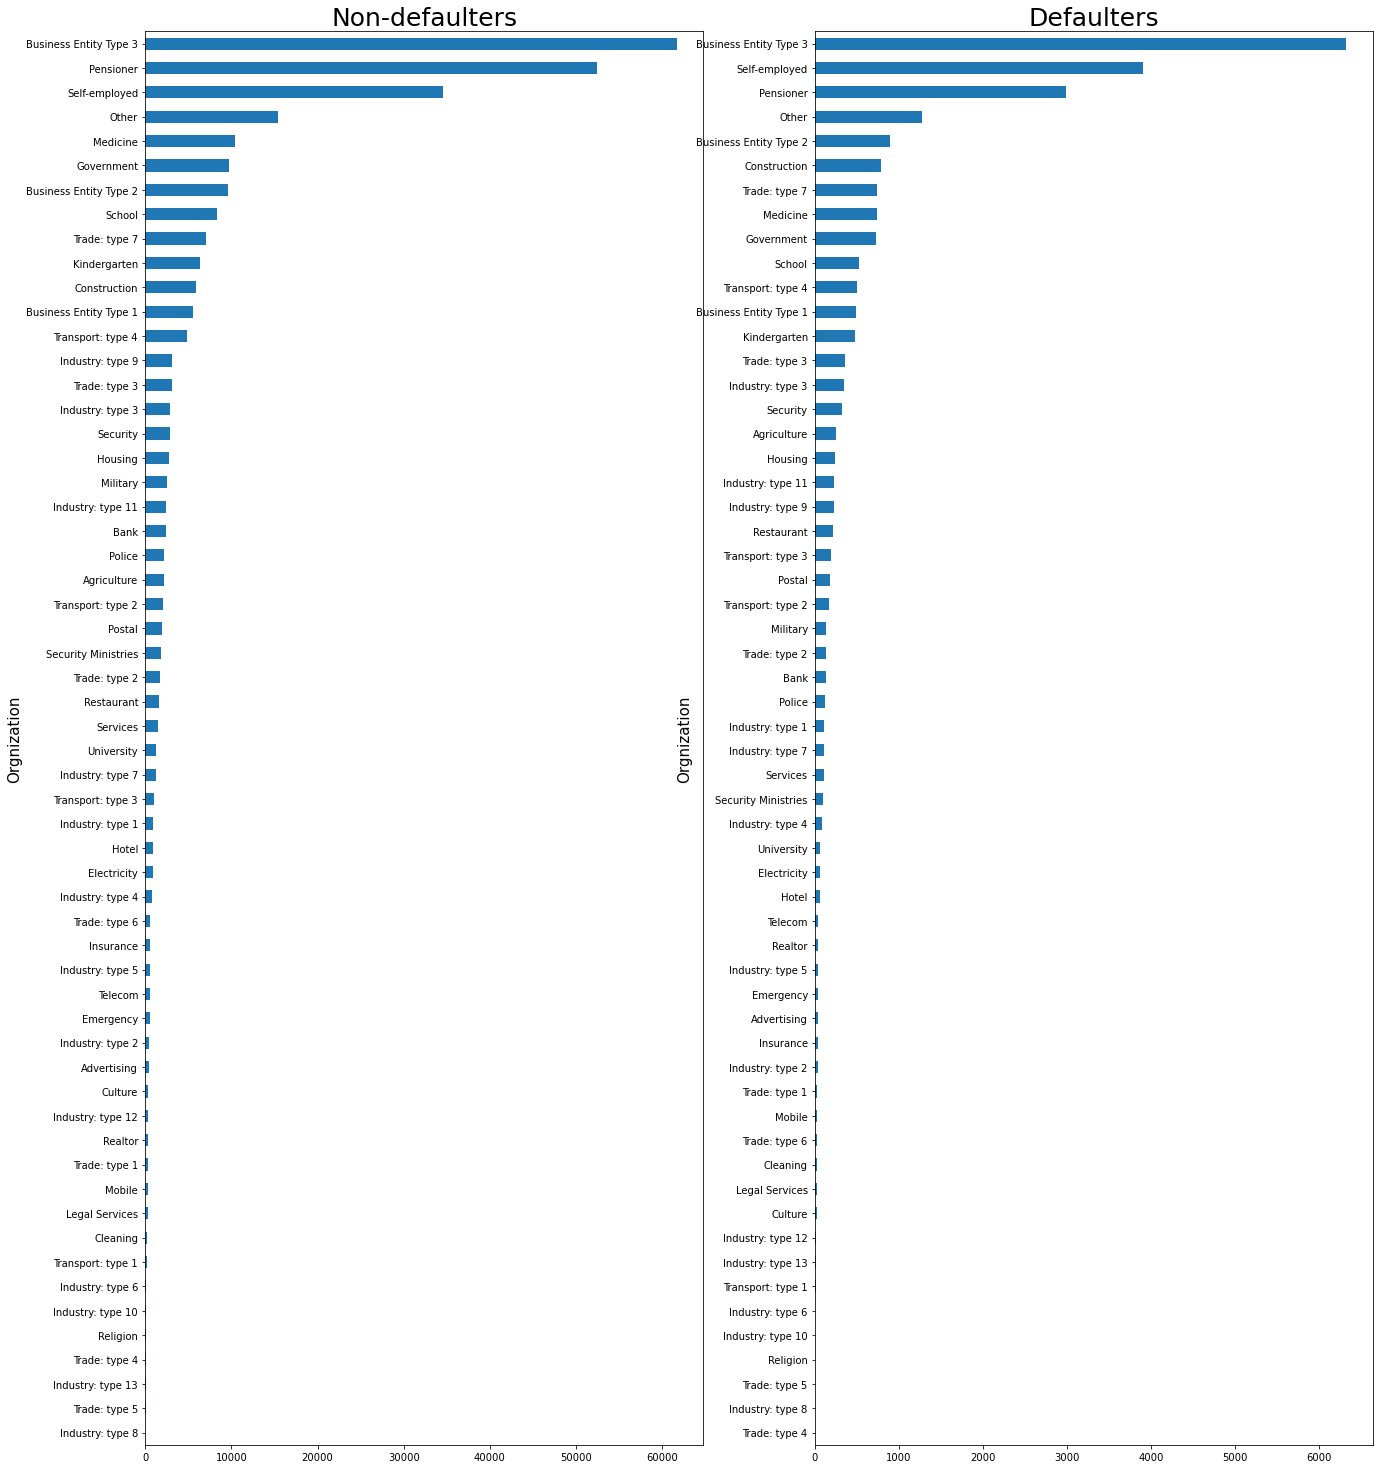

In [53]:
plt.figure(figsize=(22,26)) 
plt.subplot(121)
(Client0.groupby(["ORGANIZATION_TYPE"])["TargetCount"].sum()).sort_values().plot.barh()
plt.title("Non-defaulters",fontsize=25)
plt.ylabel("Orgnization",fontsize=15)
plt.subplot(122)
(Client1.groupby(["ORGANIZATION_TYPE"])["TargetCount"].sum()).sort_values().plot.barh()
plt.ylabel("Orgnization",fontsize=15)
plt.title("Defaulters",fontsize=25)
plt.show()

### Observation
#### Clients with ORGANIZATION_TYPE Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 applied the most for the loan as compared to others in both the cases

#### Clients having ORGANIZATION_TYPE Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8 applied lower for the loan as compared to others.

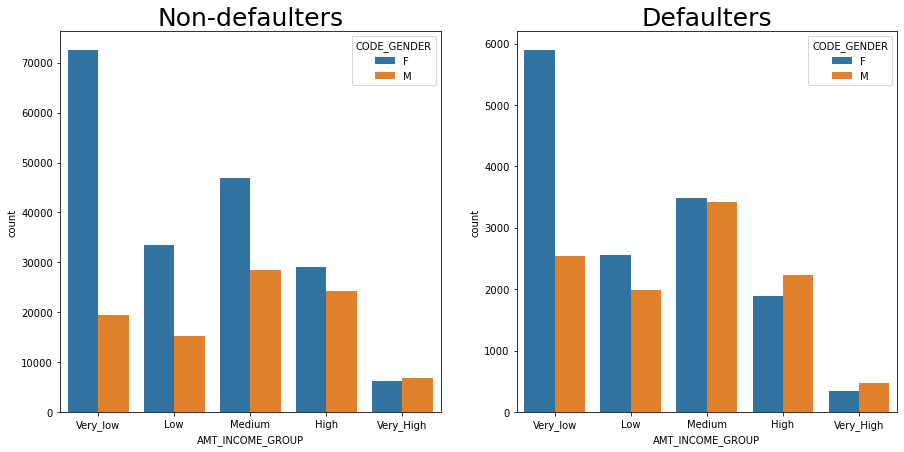

In [54]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(data = Client0, x= "AMT_INCOME_GROUP",hue = "CODE_GENDER")
plt.title("Non-defaulters",fontsize=25)
plt.subplot(122)
sns.countplot(data = Client1, x= "AMT_INCOME_GROUP",hue = "CODE_GENDER")
plt.title("Defaulters",fontsize=25)
plt.show()

### Observation
##### we have Female clients with very low income who applied for loans with both defaulter and non defaulter cases
#####  we have very less population with very high income who applied for loan

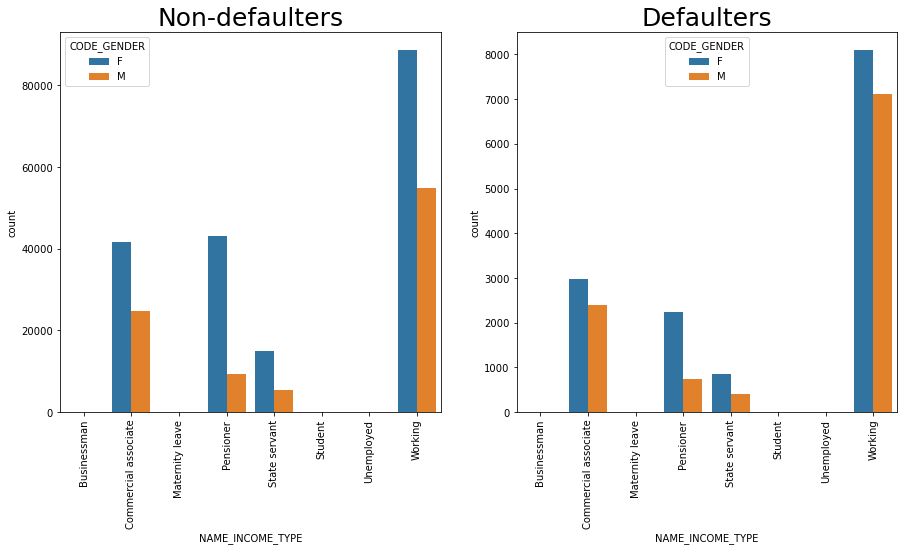

In [55]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(data = Client0, x= "NAME_INCOME_TYPE",hue = "CODE_GENDER")
plt.title("Non-defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(data = Client1, x= "NAME_INCOME_TYPE",hue = "CODE_GENDER")
plt.title("Defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.show()

### Observation
#### we have Female and male clients as a working professionals, applied for loan in defaulter and non defaulter cases
####  we have very less population as a student and unemploed who applied for loan.
#### Working category have high risk to default.
#### State Servant is at Minimal risk to default

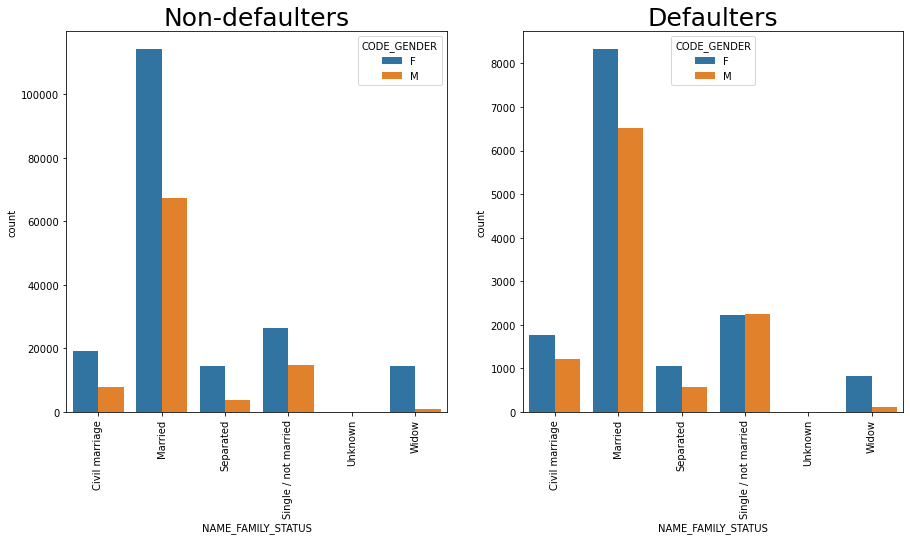

In [56]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(data = Client0, x= "NAME_FAMILY_STATUS",hue = "CODE_GENDER")
plt.title("Non-defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(data = Client1, x= "NAME_FAMILY_STATUS",hue = "CODE_GENDER")
plt.title("Defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.show()

### Observation
#### we have Married Clients seems to be applied most for loan in defaulter and non defaulter cases
####  In case of Defaulters,Clients having single relationship are less risky
#### Widows are with Minimal risk.

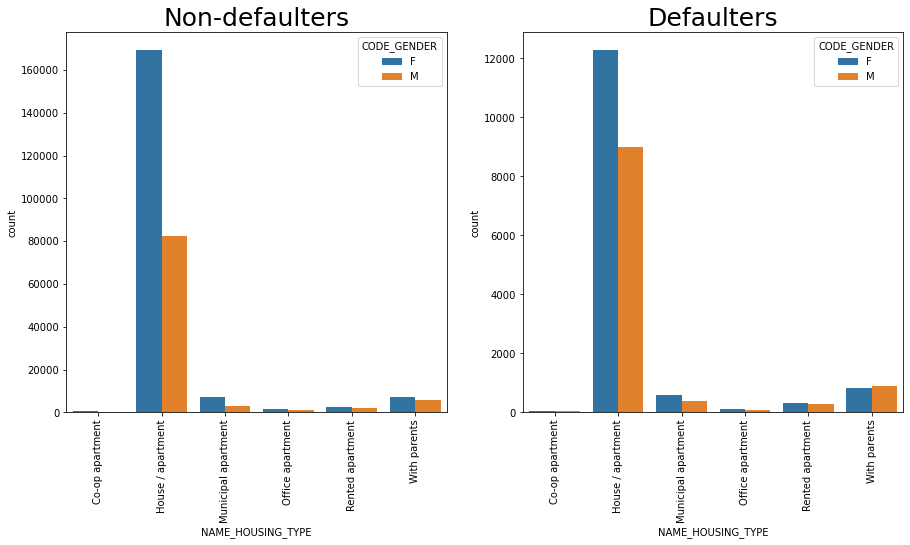

In [57]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(data = Client0, x= "NAME_HOUSING_TYPE",hue = "CODE_GENDER")
plt.title("Non-defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(data = Client1, x= "NAME_HOUSING_TYPE",hue = "CODE_GENDER")
plt.title("Defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.show()

### Observation
#### we have clients living in House or apartment to be applied most for loan in defaulter and non defaulter cases
####  In case of Defaulters,Clients with parents , office, municipal and rented apartment are less risky
#### Clients living in House or apartment are highly risky

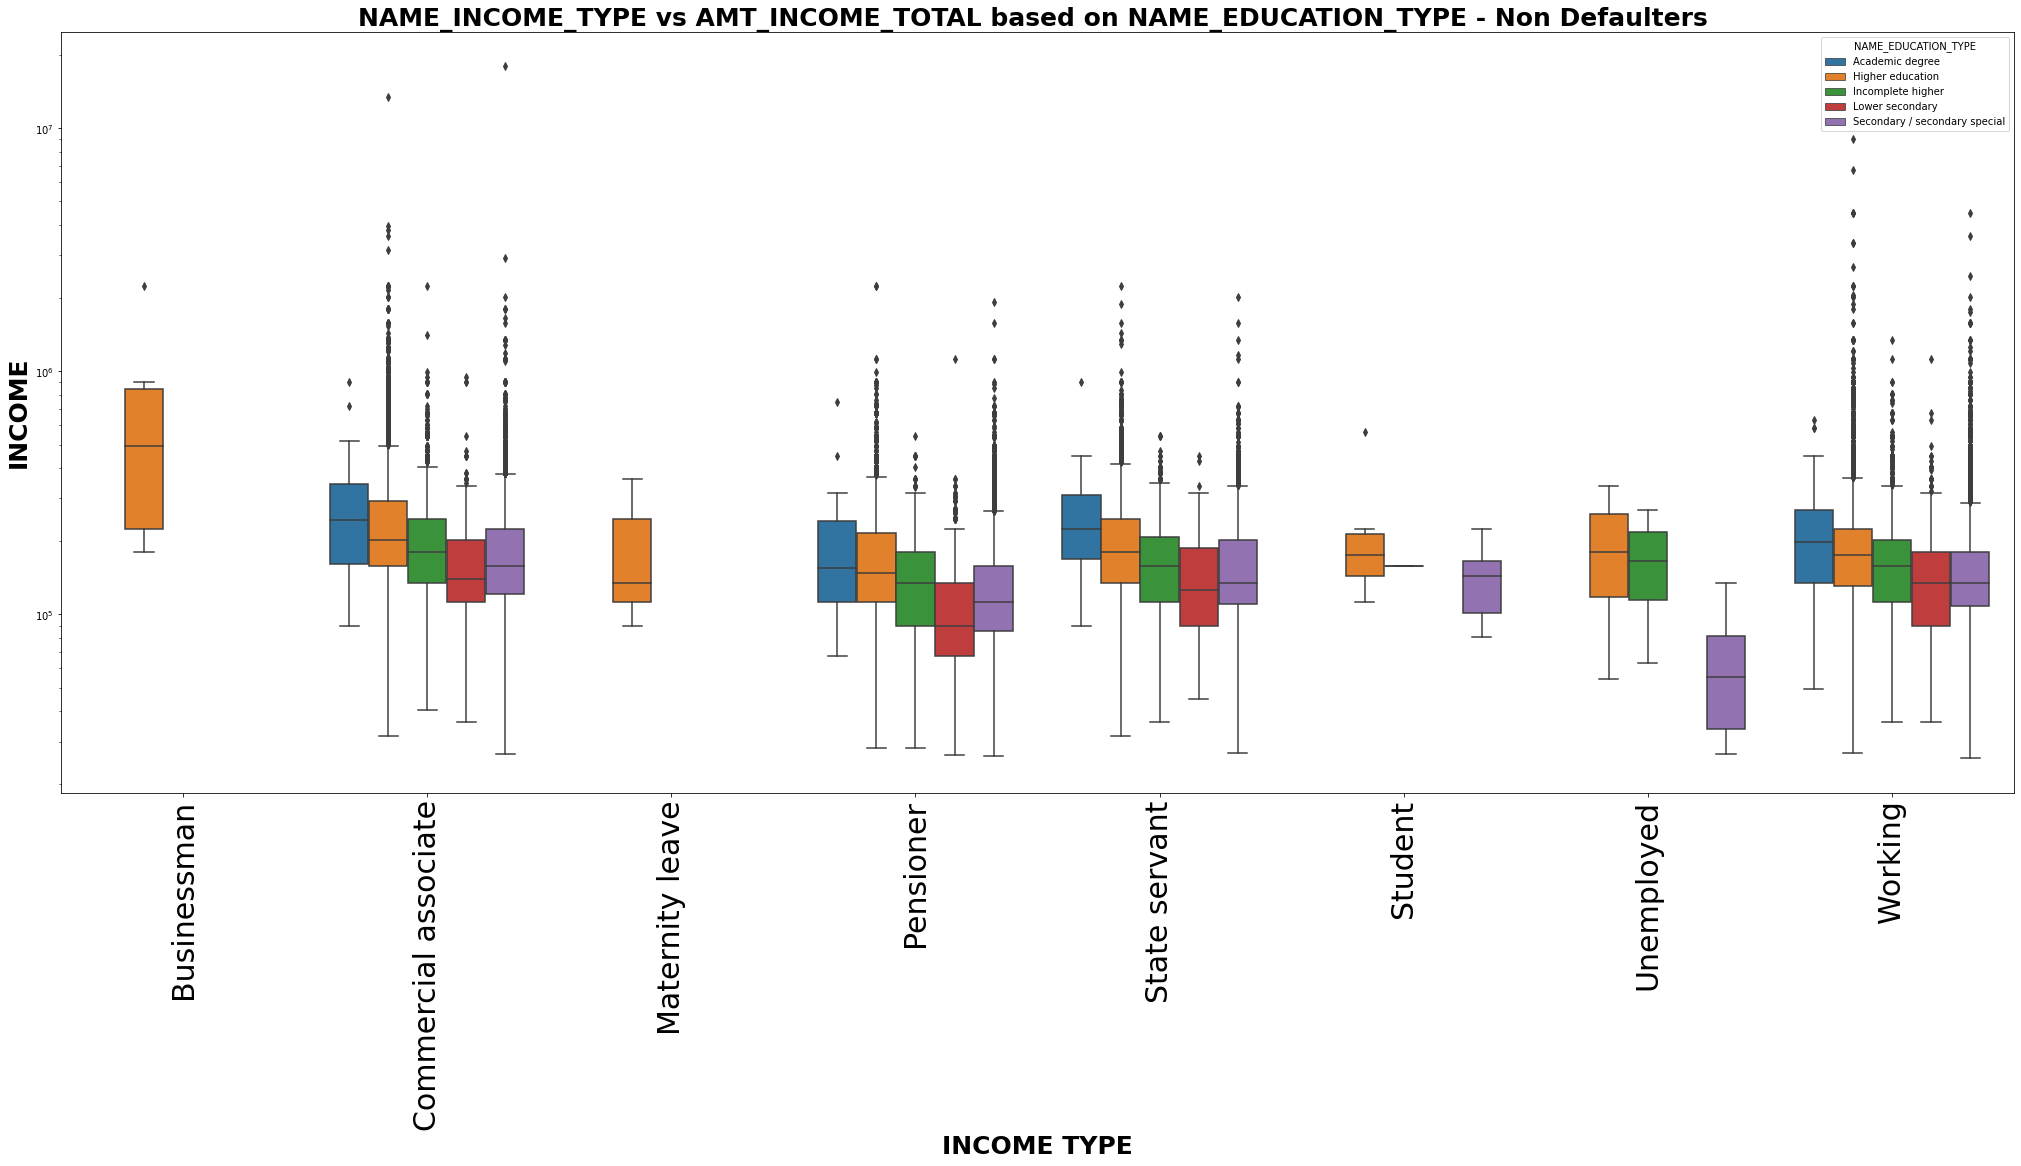

In [58]:
plt.figure(figsize=(35,14))
plt.yscale('log') 
sns.boxplot(data =Client0, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_EDUCATION_TYPE')
plt.xticks(rotation = 90,fontsize=30)
plt.title("NAME_INCOME_TYPE vs AMT_INCOME_TOTAL based on NAME_EDUCATION_TYPE - Non Defaulters ",fontsize= 25, fontweight="bold")
plt.xlabel("INCOME TYPE",fontsize= 25, fontweight="bold")
plt.ylabel("INCOME",fontsize= 25, fontweight="bold")
plt.show()

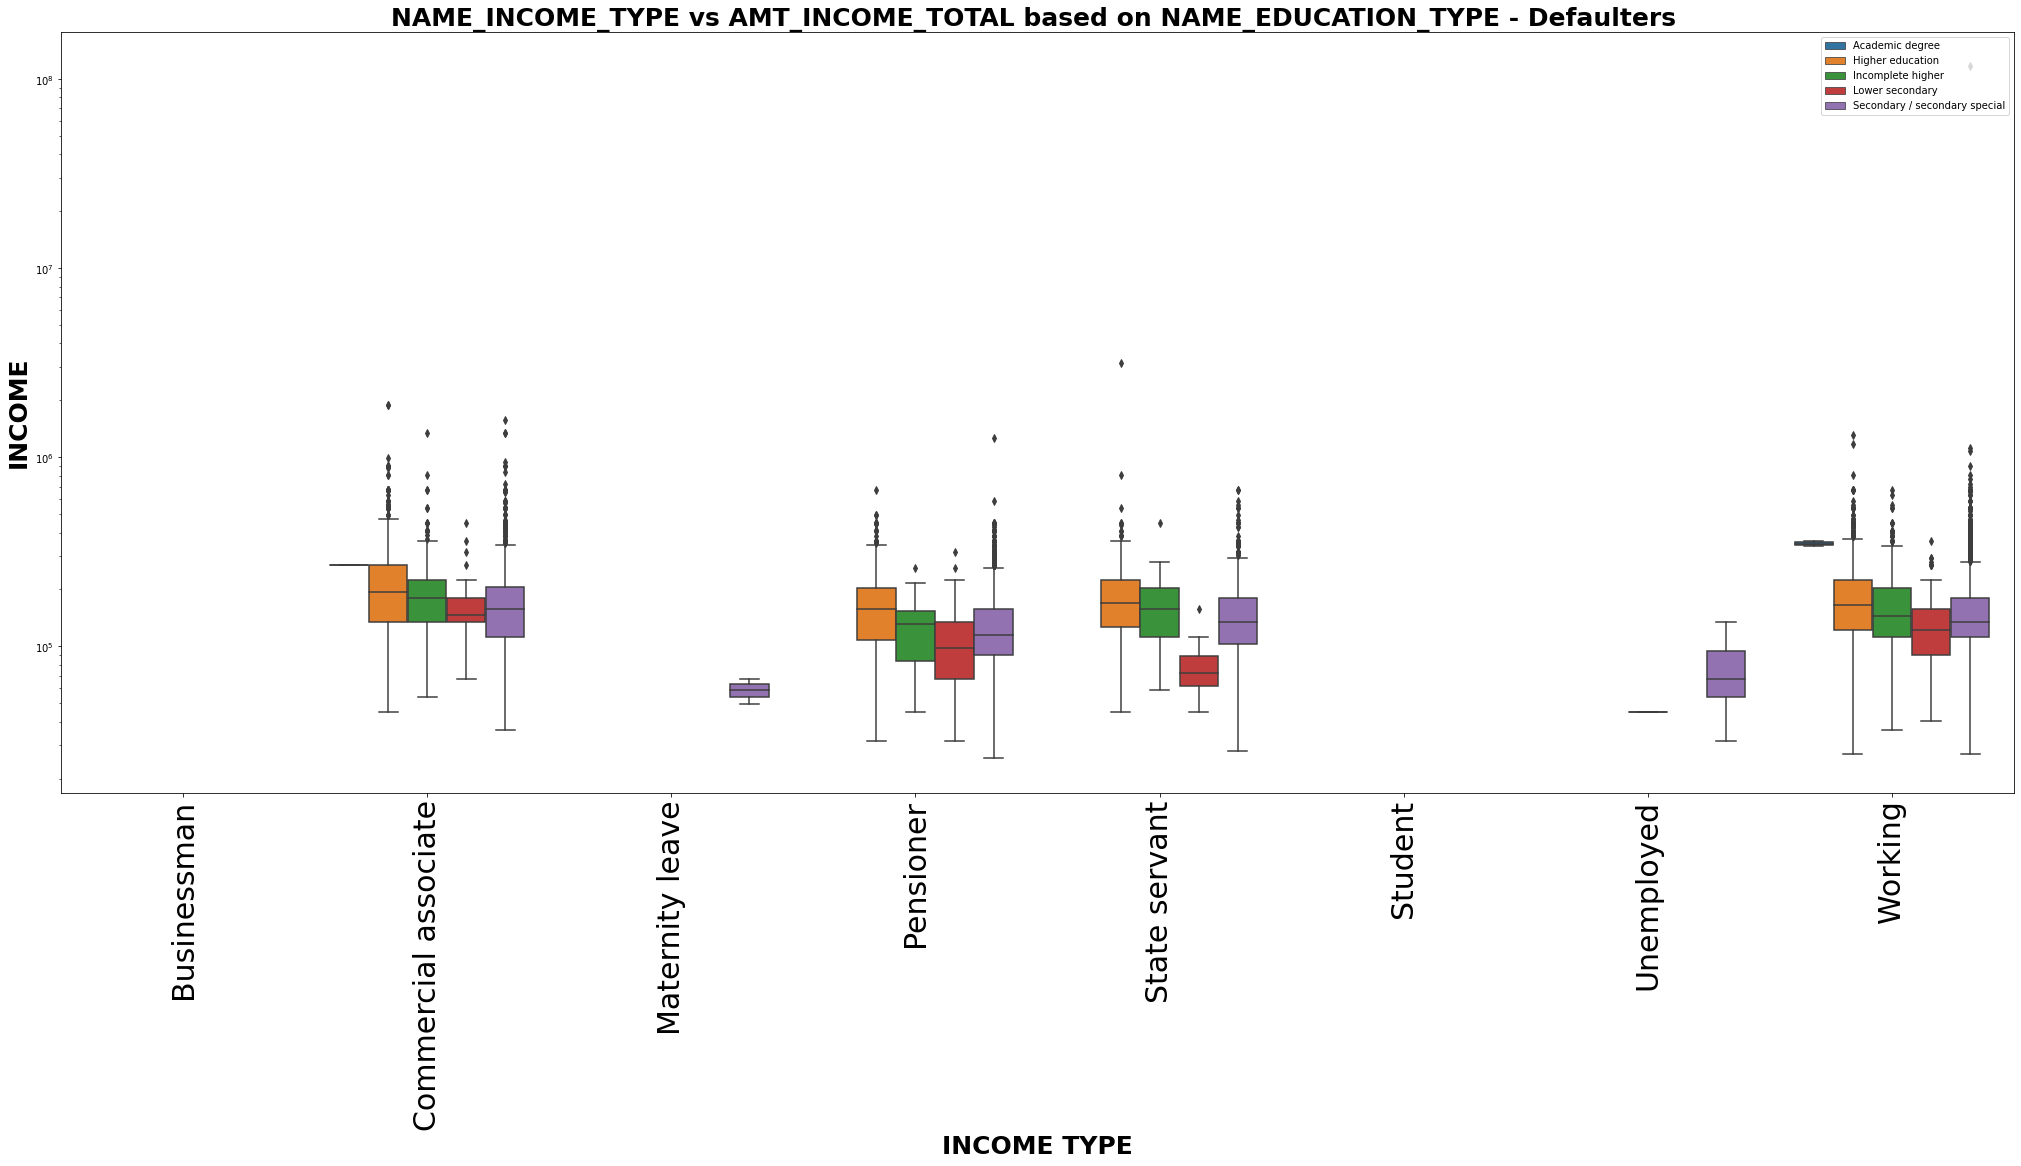

In [59]:
plt.figure(figsize=(35,14))
plt.yscale('log') 
sns.boxplot(data =Client1, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_EDUCATION_TYPE')
plt.xticks(rotation = 90,fontsize=30)
plt.legend( loc = 'upper right') 
plt.title("NAME_INCOME_TYPE vs AMT_INCOME_TOTAL based on NAME_EDUCATION_TYPE - Defaulters " ,fontsize= 25, fontweight="bold")
plt.xlabel("INCOME TYPE",fontsize= 25, fontweight="bold")
plt.ylabel("INCOME",fontsize= 25, fontweight="bold")
plt.show()

### Observations
#### Business clients with Higher education having very few outliers in data followed by  Maternity, student, unemployed clients

#### Commercial associate, Pensioner, state servant and working clients applied most with high number of outliers

#### Very less chances when business clients and students will get default in loan repayment

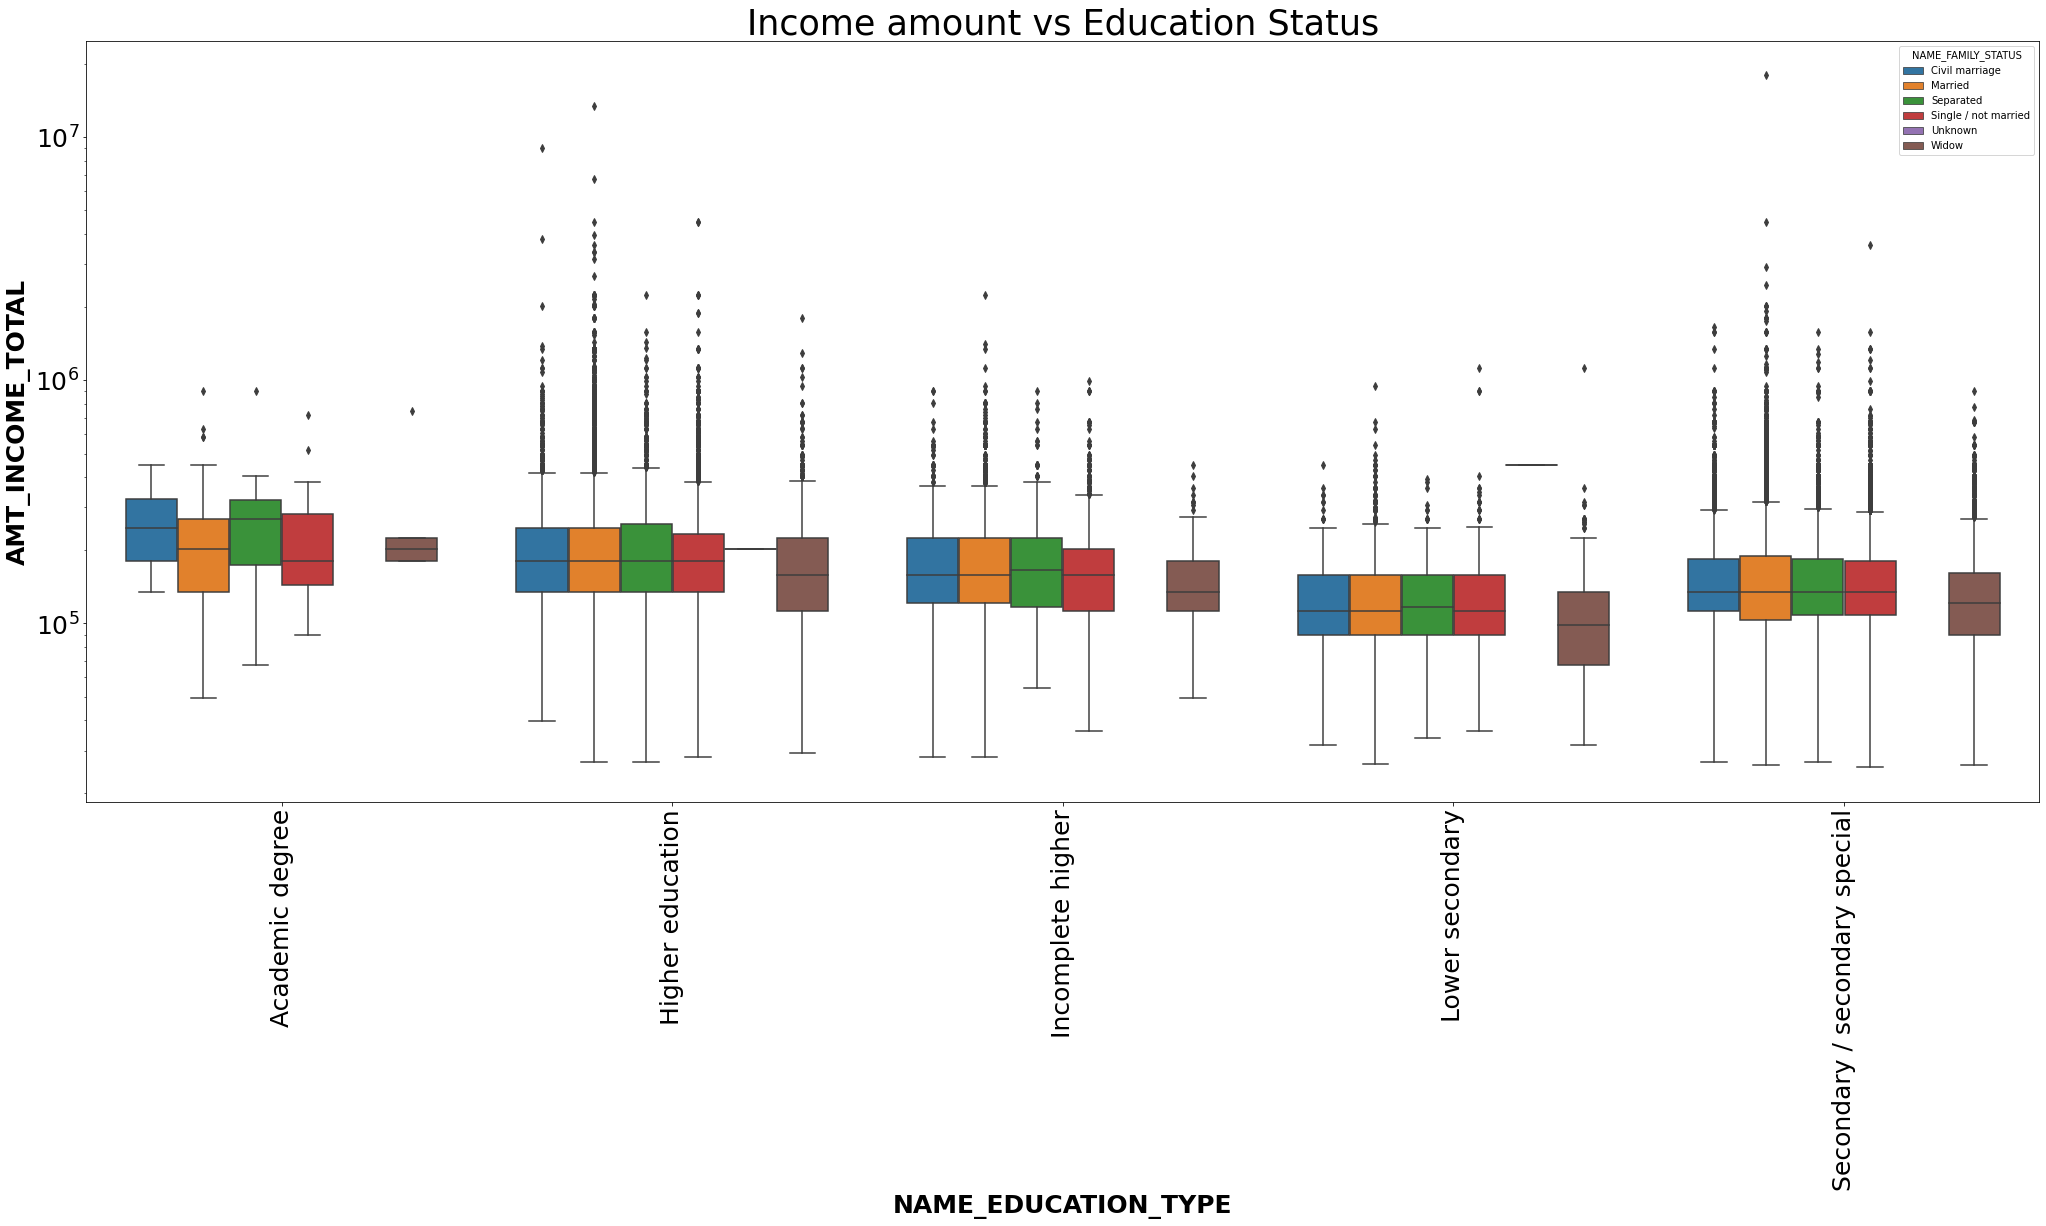

In [60]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.boxplot(data =Client0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS')                                             #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 25, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 25, fontweight="bold")
plt.xticks(rotation=90, fontsize=25)
plt.yticks(rotation=360, fontsize=25)
plt.show()

### Observation
#### Clients having Higher Education have the highest income compared to others. with outliers
#### Some of the clients who haven’t completed their Higher Education and with Secondary/Secondary Special Education have higher incomes and outliers

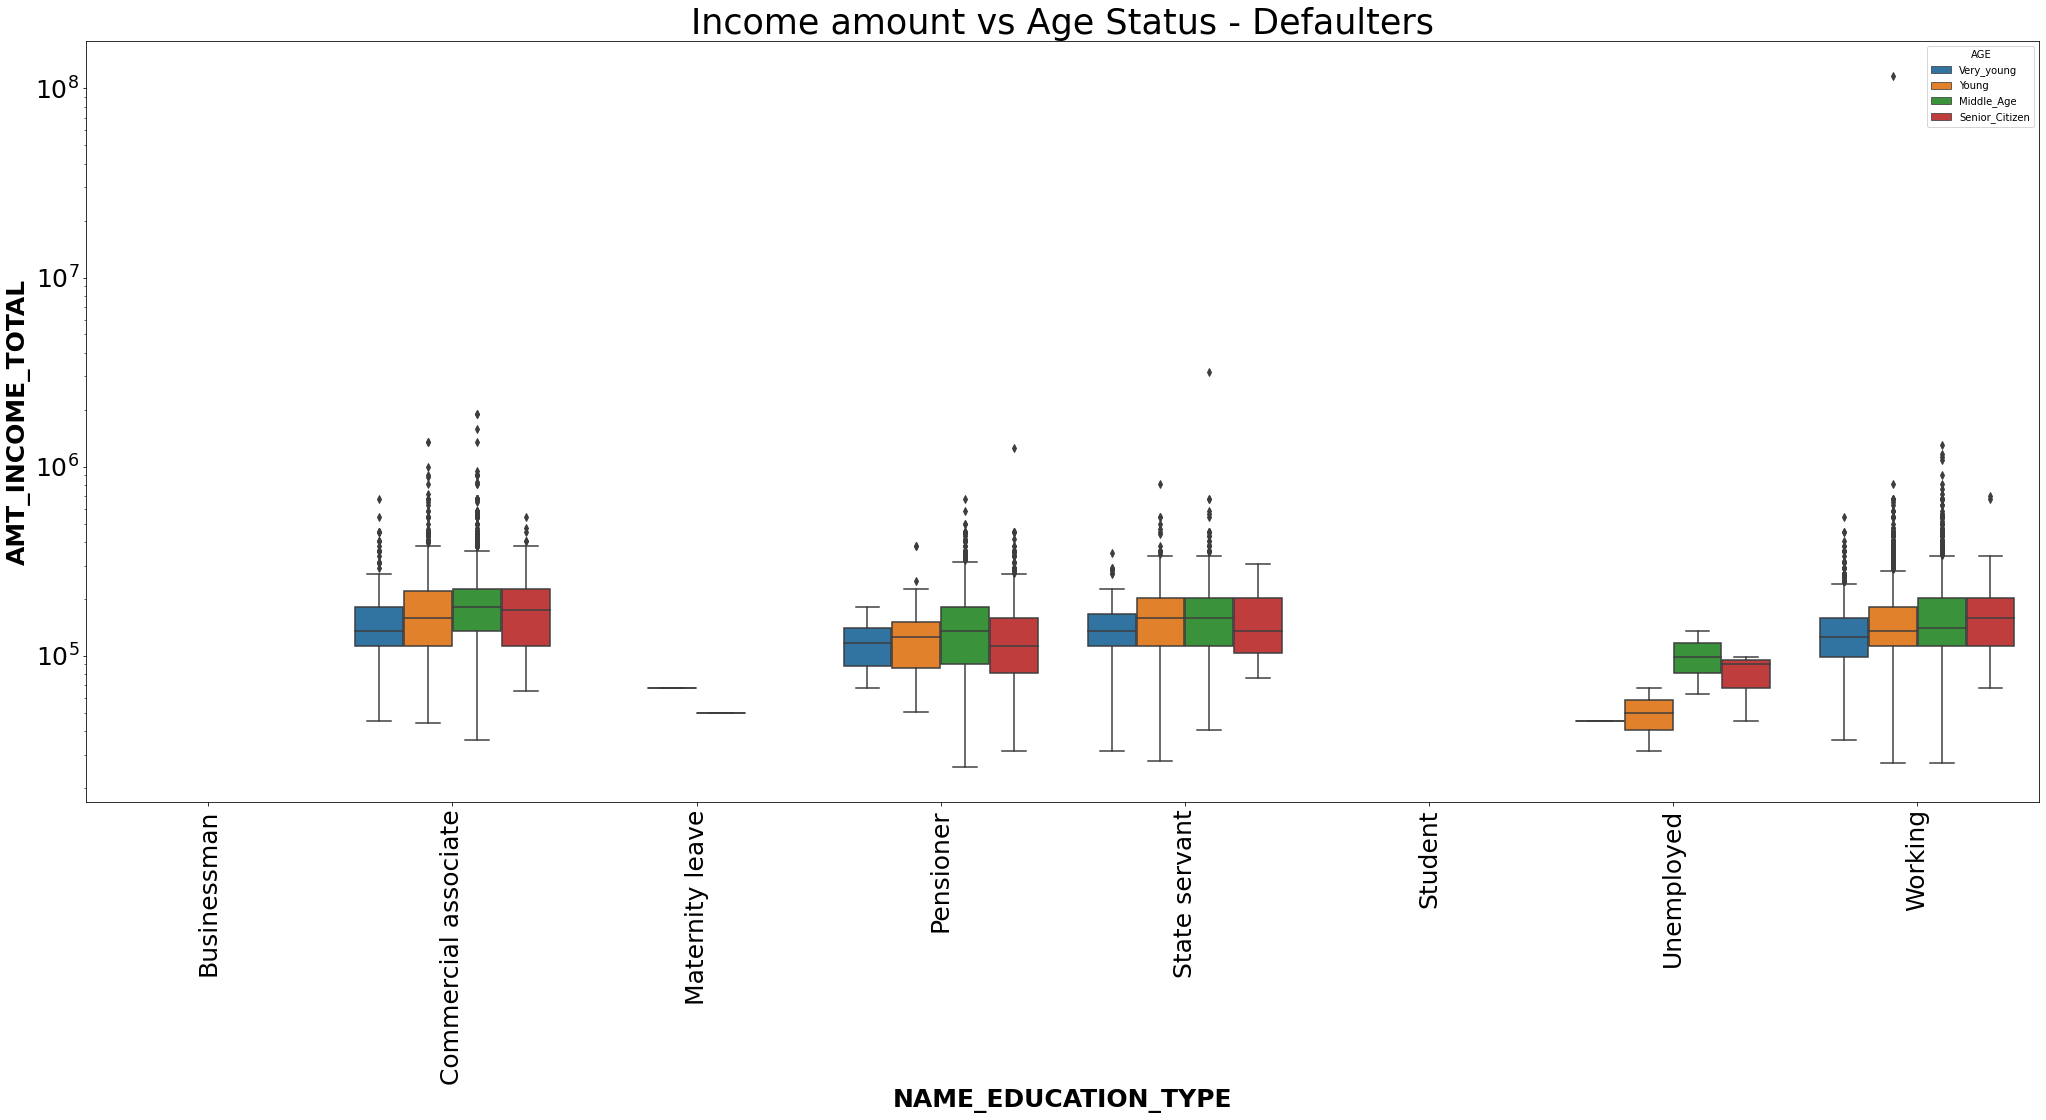

In [61]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.boxplot(data =Client1, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue ='AGE')                                             #Adjusting legend position
plt.title('Income amount vs Age Status - Defaulters',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 25, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 25, fontweight="bold")
plt.xticks(rotation=90, fontsize=25)
plt.yticks(rotation=360, fontsize=25)
plt.show()

### Observation
#### Clients having working, commercial, pensioner and state servant! with all age group contain outliers
#### Business Man and Students are not possible to make late payments in any age group

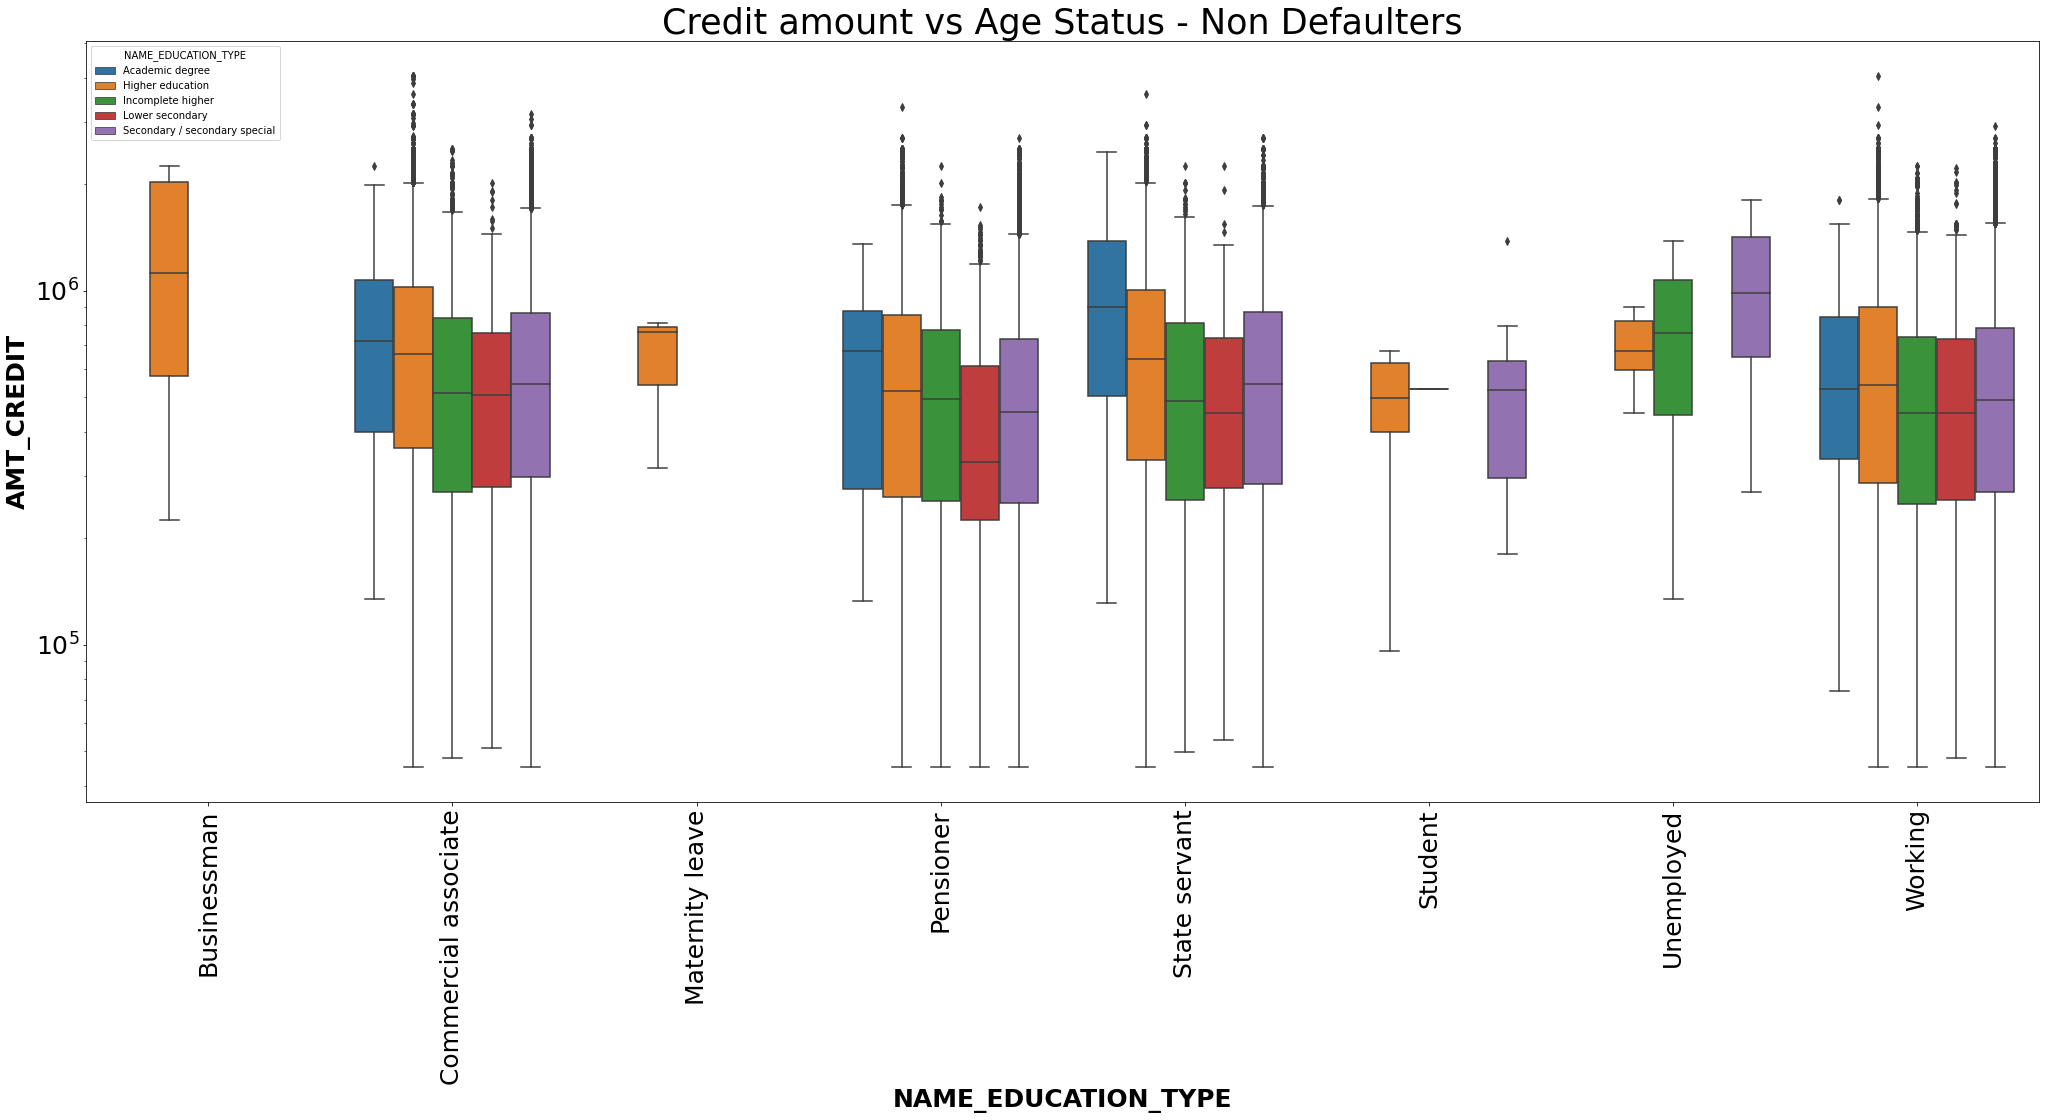

In [62]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.boxplot(data =Client0, x='NAME_INCOME_TYPE',y='AMT_CREDIT',hue ='NAME_EDUCATION_TYPE')                                             #Adjusting legend position
plt.title('Credit amount vs Age Status - Non Defaulters',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 25, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 25, fontweight="bold")
plt.xticks(rotation=90, fontsize=25)
plt.yticks(rotation=360, fontsize=25)
plt.show()

### Observation
#### Students with higher education are likely to take less credit loan and with no outlier with Businessman having higher education
#### Working professionals along with Commercial associate, Pensioner and state servant holds highest outlier 

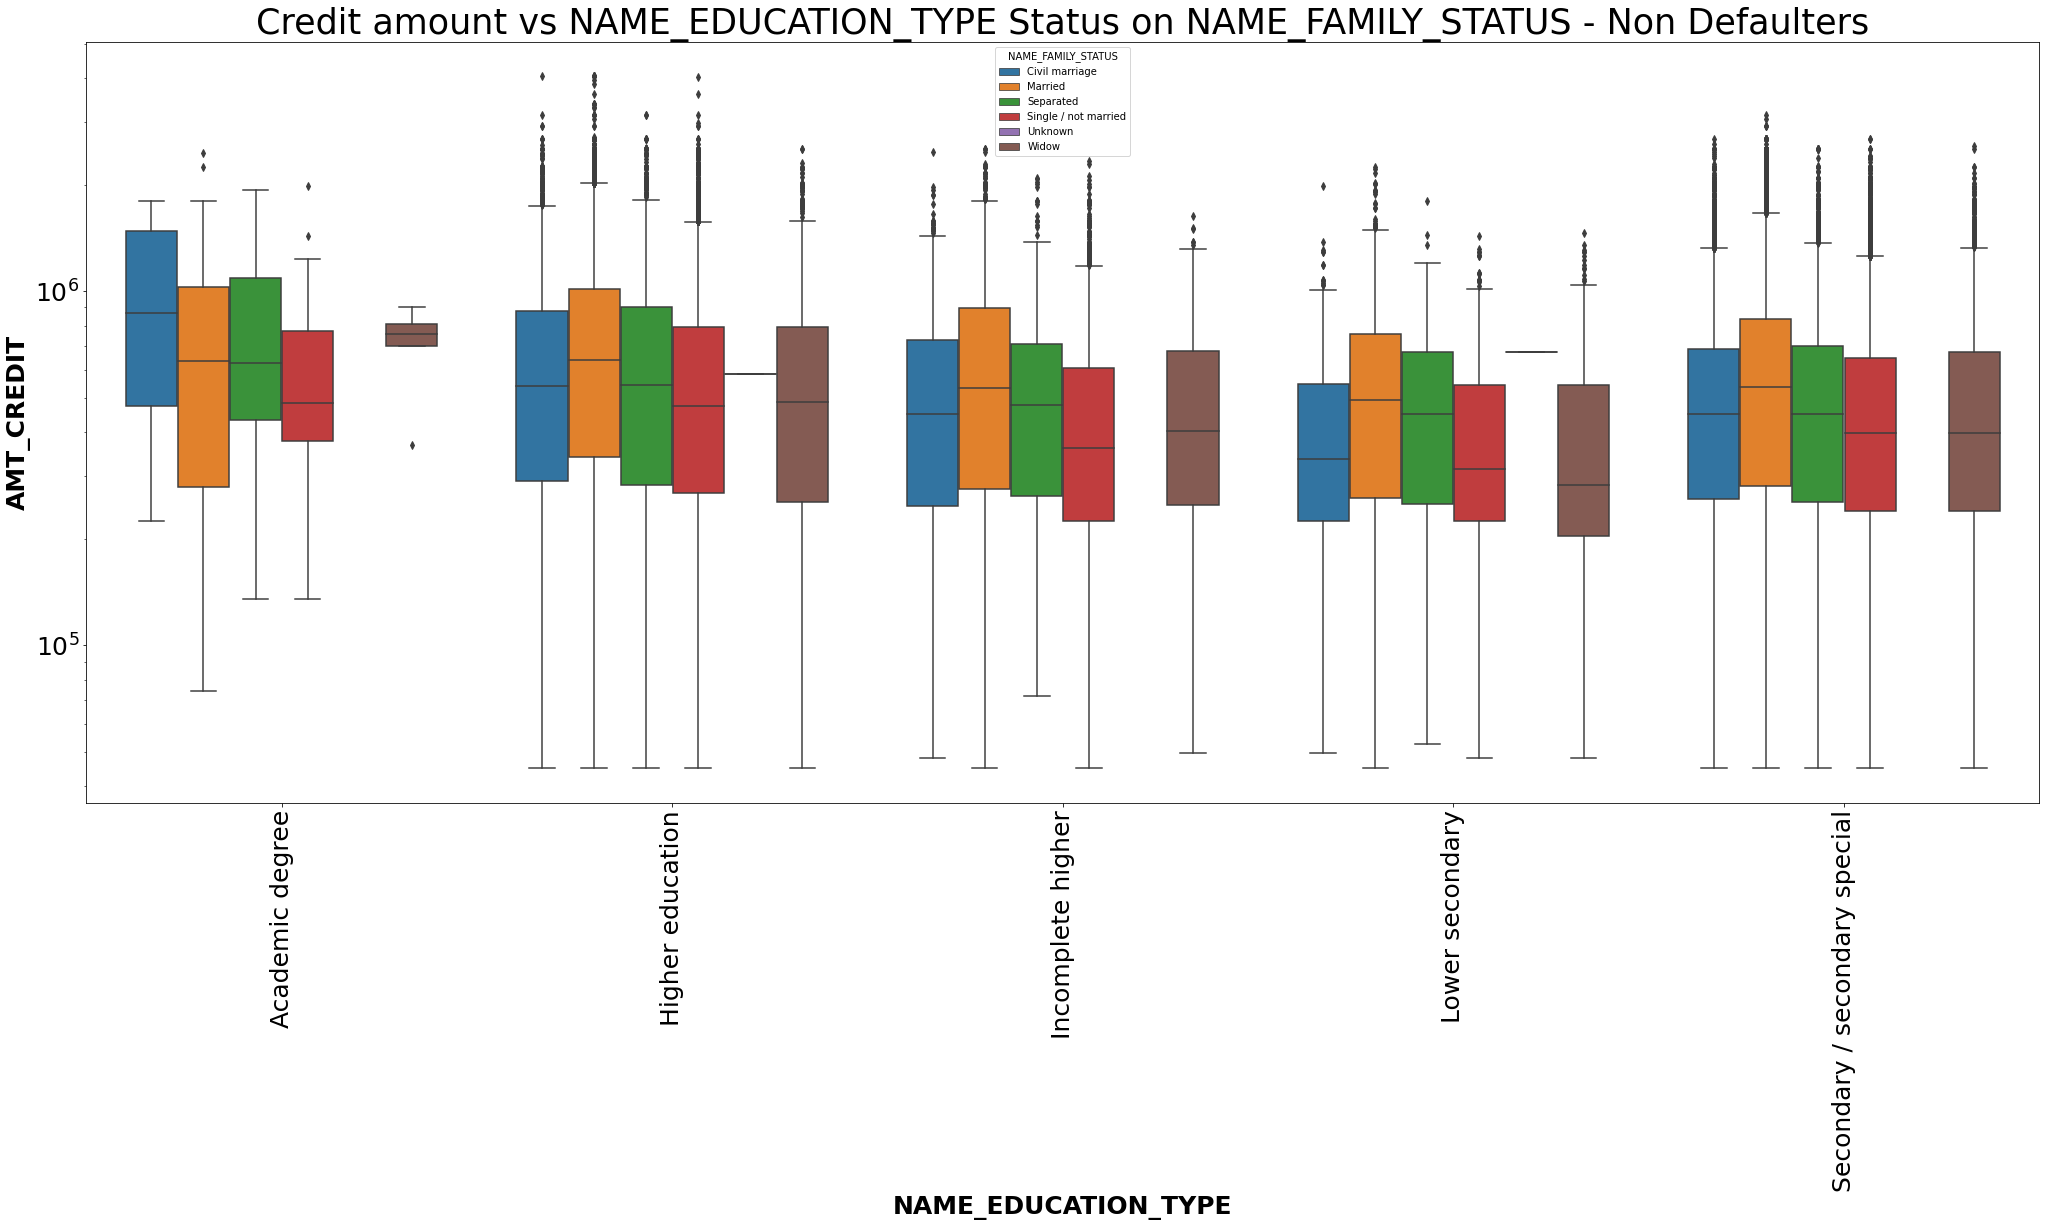

In [63]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.boxplot(data =Client0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue ='NAME_FAMILY_STATUS')                                             #Adjusting legend position
plt.title('Credit amount vs NAME_EDUCATION_TYPE Status on NAME_FAMILY_STATUS - Non Defaulters',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 25, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 25, fontweight="bold")
plt.xticks(rotation=90, fontsize=25)
plt.yticks(rotation=360, fontsize=25)
plt.show()

### Observation 
#### clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit loans.


#### Non - Defaulter applications count for each group

In [64]:
#let's populate pivot table
table0 = pd.pivot_table(Client0, values='TargetCount', index=['NAME_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=sum)

#from below count values in each group we can decide how may application we received for each group and we should proceed with them or not

table0
#Non - Defaulters application counts

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_INCOME_TYPE,,,,,
Businessman,0.0,10.0,0.0,0.0,0.0
Commercial associate,42.0,22782.0,3121.0,404.0,39908.0
Maternity leave,0.0,3.0,0.0,0.0,0.0
Pensioner,26.0,7848.0,495.0,1427.0,42584.0
State servant,23.0,8519.0,718.0,94.0,11100.0
Student,0.0,6.0,1.0,0.0,11.0
Unemployed,0.0,6.0,2.0,0.0,6.0
Working,70.0,31680.0,5068.0,1474.0,105258.0


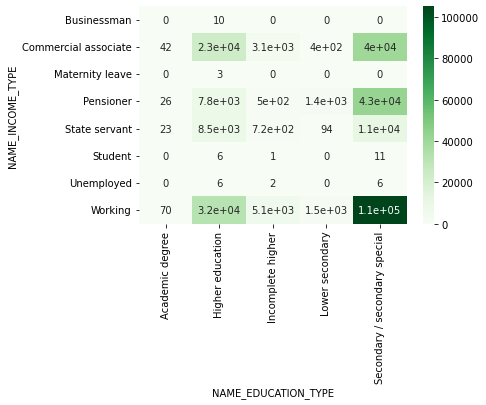

In [65]:
#lets populate heatmap for the same
sns.heatmap(table0,annot=True,cmap="Greens")
plt.show()

#### Defaulter application count for each group

In [66]:
table1 = pd.pivot_table(Client1, values='TargetCount', index=['CODE_GENDER','NAME_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=sum)

#from below count values in each group we can decide how may application we received for each group and we should proceed with them or not

table1

NAME_EDUCATION_TYPE               Academic degree  Higher education  \
CODE_GENDER NAME_INCOME_TYPE                                          
F           Businessman                       0.0               0.0   
            Commercial associate              1.0             723.0   
            Maternity leave                   0.0               0.0   
            Pensioner                         0.0             229.0   
            State servant                     0.0             238.0   
            Student                           0.0               0.0   
            Unemployed                        0.0               0.0   
            Working                           2.0            1248.0   
M           Businessman                       0.0               0.0   
            Commercial associate              0.0             520.0   
            Maternity leave                   0.0               0.0   
            Pensioner                         0.0             111.0   
            State servant                     0.0             106.0   
            Student                           0.0               0.0   
            Unemployed                        0.0               0.0   
            Working                           0.0             834.0   

NAME_EDUCATION_TYPE               Incomplete higher  Lower secondary  \
CODE_GENDER NAME_INCOME_TYPE                                           
F           Businessman                         0.0              0.0   
            Commercial associate              155.0             28.0   
            Maternity leave                     0.0              0.0   
            Pensioner                          16.0             73.0   
            State servant                      34.0              8.0   
            Student                             0.0              0.0   
            Unemployed                          1.0              0.0   
            Working                           298.0            105.0   
M           Businessman                         0.0              0.0   
            Commercial associate              124.0             28.0   
            Maternity leave                     0.0              0.0   
            Pensioner                           7.0             29.0   
            State servant                      18.0              0.0   
            Student                             0.0              0.0   
            Unemployed                          0.0              0.0   
            Working                           219.0            146.0   

NAME_EDUCATION_TYPE               Secondary / secondary special  
CODE_GENDER NAME_INCOME_TYPE                                     
F           Businessman                                     0.0  
            Commercial associate                         2061.0  
            Maternity leave                                 2.0  
            Pensioner                                    1925.0  
            State servant                                 567.0  
            Student                                         0.0  
            Unemployed                                      5.0  
            Working                                      6451.0  
M           Businessman                                     0.0  
            Commercial associate                         1720.0  
            Maternity leave                                 0.0  
            Pensioner                                     592.0  
            State servant                                 278.0  
            Student                                         0.0  
            Unemployed                                      2.0  
            Working                                      5921.0

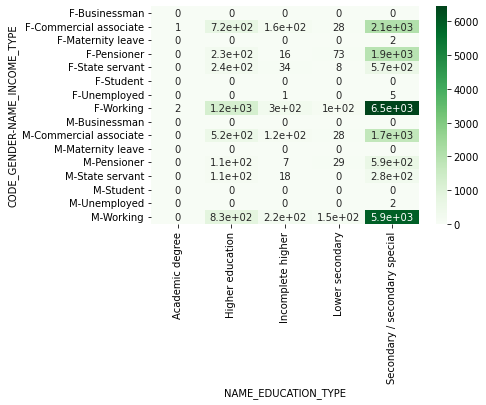

In [67]:
#lets populate heatmap for the same
sns.heatmap(table1,annot=True,cmap="Greens")
plt.show()

#### Bank can proceed with Male or Female BusinessMan and Students as they have very less chances to defaults from all above observations
#### 3 Female businessman and 7 male along with 2 Female and 4 Male are completely default free apllications for processing
#### Bank should focus less on working profession and Commercial associate as they have history of late payments (12372 applicant as working and 3781 Commercial associate are in defaulters with Secondary education )

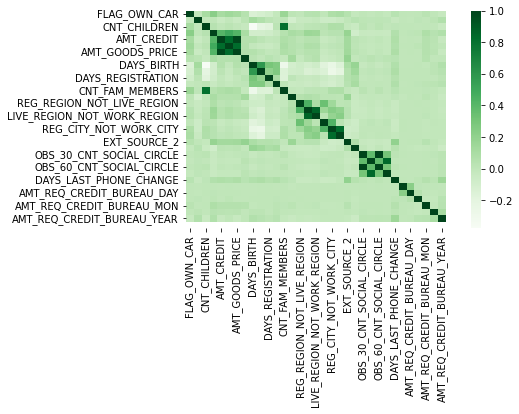

In [68]:
# Finding some correlation for numerical columns for both target 0 and 1 
sns.heatmap(Client0.iloc[0:,2:].corr(method='spearman'),cmap="Greens")
plt.show()

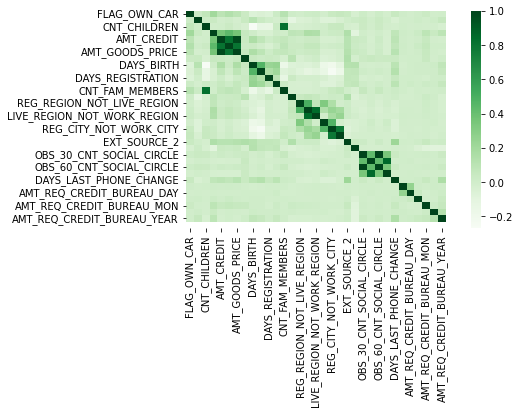

In [69]:
sns.heatmap(Client1.iloc[0:,2:].corr(method='spearman'),cmap="Greens")
plt.show()

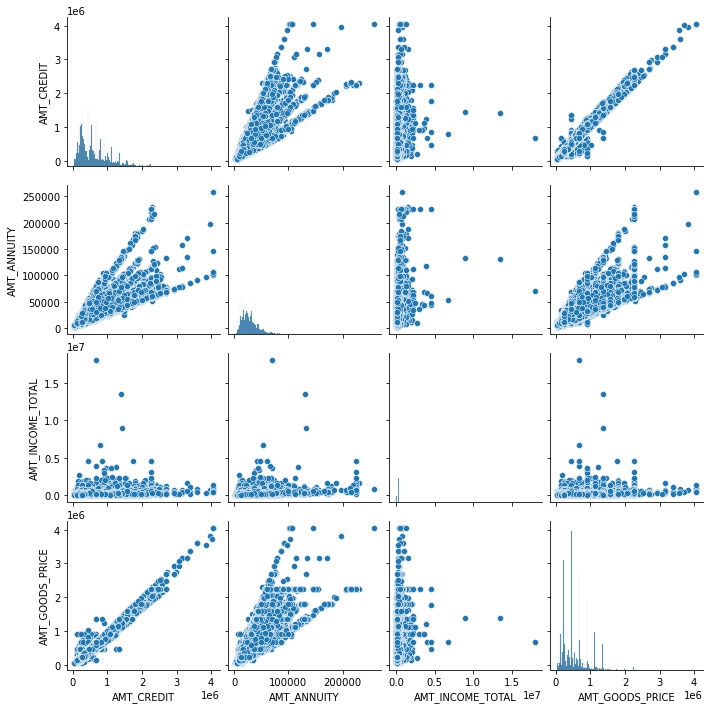

In [70]:
#Pair polot for AMT_CREDIT ,AMT_GOODS_PRICE , AMT_ANNUITY and AMT_INCOME_TOTAL columns

sns.pairplot(Client0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']])
plt.show()

### Observation
####  AMT_CREDIT and AMT_GOODS_PRICE  are highly correlated with each other, one increases other
#### AMT_CREDIT and AMT_ANNUITY  are also highly correlated with each other
#### AMT_GOODS_PRICE and  AMT_ANNUITY are highly correlated

#### Increase in Credit amount will  increase EMI amount at the same time increase in property price will increase EMI and CREDIT

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



### Before we conclude anything lets take a look at previous application history data

In [71]:
histo.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,45000.0,SATURDAY,16,Y,...,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0,high,Cash Street: high
51,2664403,163660,Cash loans,9804.285,67500.0,82611.0,67500.0,SATURDAY,10,Y,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
85,1981960,306707,Cash loans,10678.005,225000.0,269550.0,225000.0,WEDNESDAY,11,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,low_normal,Cash Street: low


In [72]:
#we have SK_ID_CURR  common in both the dataframes, so lets merge the dataframe into one by using SK_ID_CURR                                          
#NAME_CASH_LOAN_PURPOSE, #NAME_CONTRACT_STATUS
data = pd.merge(app,histo,how='inner', on ="SK_ID_CURR")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,0,1,0,90000.0,180000.0,9000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,0,1,0,292500.0,665892.0,24592.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,1,0,1,360000.0,733315.5,39069.0,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,1,1,0,180000.0,540000.0,27000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,1,1,0,180000.0,540000.0,27000.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [73]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CR

In [74]:
# Removing unwanted columns for analysis

data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_y',
              'HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

#### We need few columns for our analysis from previous data 
#### NAME_CASH_LOAN_PURPOSE,  NAME_CONTRACT_STATUS, AMT_CREDIT_y, AMT_ANNUITY_y

In [75]:
#lets rename _y column with _previous 
data = data.rename({'AMT_CREDIT_y' : 'AMT_CREDIT_prev','AMT_ANNUITY_y':'AMT_ANNUITY_prev' }, axis=1)

In [76]:
#verify columnms
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',
       'AMT_INCOME_GROUP', 'AMT_CREDIT_GROUP', 'TargetCount', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNU

In [77]:
#let's devide whole data into defaulters and non defaulters data set 
data0 = data[data['TARGET']==0]
data1 = data[data['TARGET']==1]

In [78]:
#lets verify shape
data0.shape

(51674, 61)

In [79]:
#lets verify shape
data1.shape


(7739, 61)

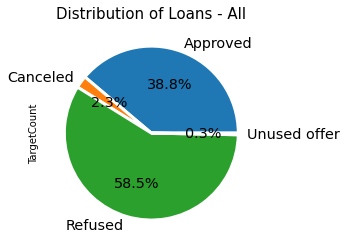

In [80]:
data.groupby("NAME_CONTRACT_STATUS")["TargetCount"].sum().plot.pie(autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.title('Distribution of Loans - All',fontsize=15)
plt.show()

#### Previously 38.8% loans are approved, 2.3% are cancelled , 58.5% are Refused and 0.3% are Unused

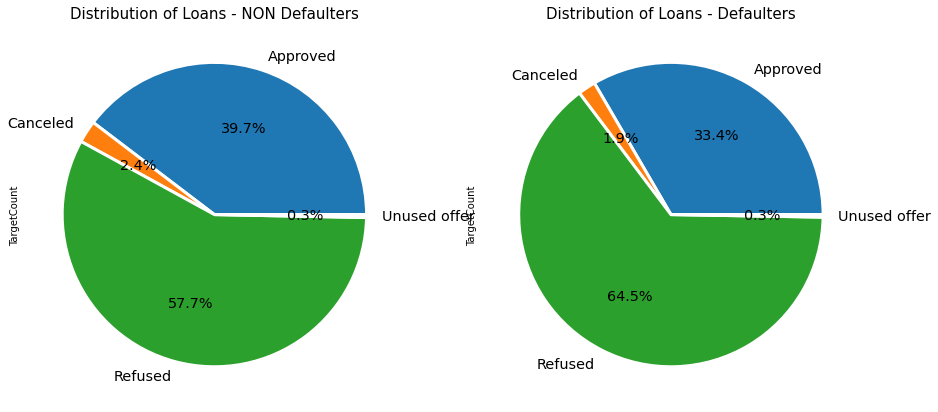

In [81]:
#lets plot the chart with defaulter and non defaulter values with new target columns
#NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, AMT_CREDIT_y, AMT_ANNUITY_y
#plot a pie chart of loan type distribution with client status 0,1 
plt.figure(figsize=(15,7)) 
plt.subplot(121)
data0.groupby("NAME_CONTRACT_STATUS")["TargetCount"].sum().plot.pie(autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.title('Distribution of Loans - NON Defaulters',fontsize=15)
plt.subplot(122)
data1.groupby("NAME_CONTRACT_STATUS")["TargetCount"].sum().plot.pie(autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.title('Distribution of Loans - Defaulters',fontsize=15)
plt.show()

#### Previously 39.7% of clients whose loans are approved are non defaulter and 33.4% are defaulters

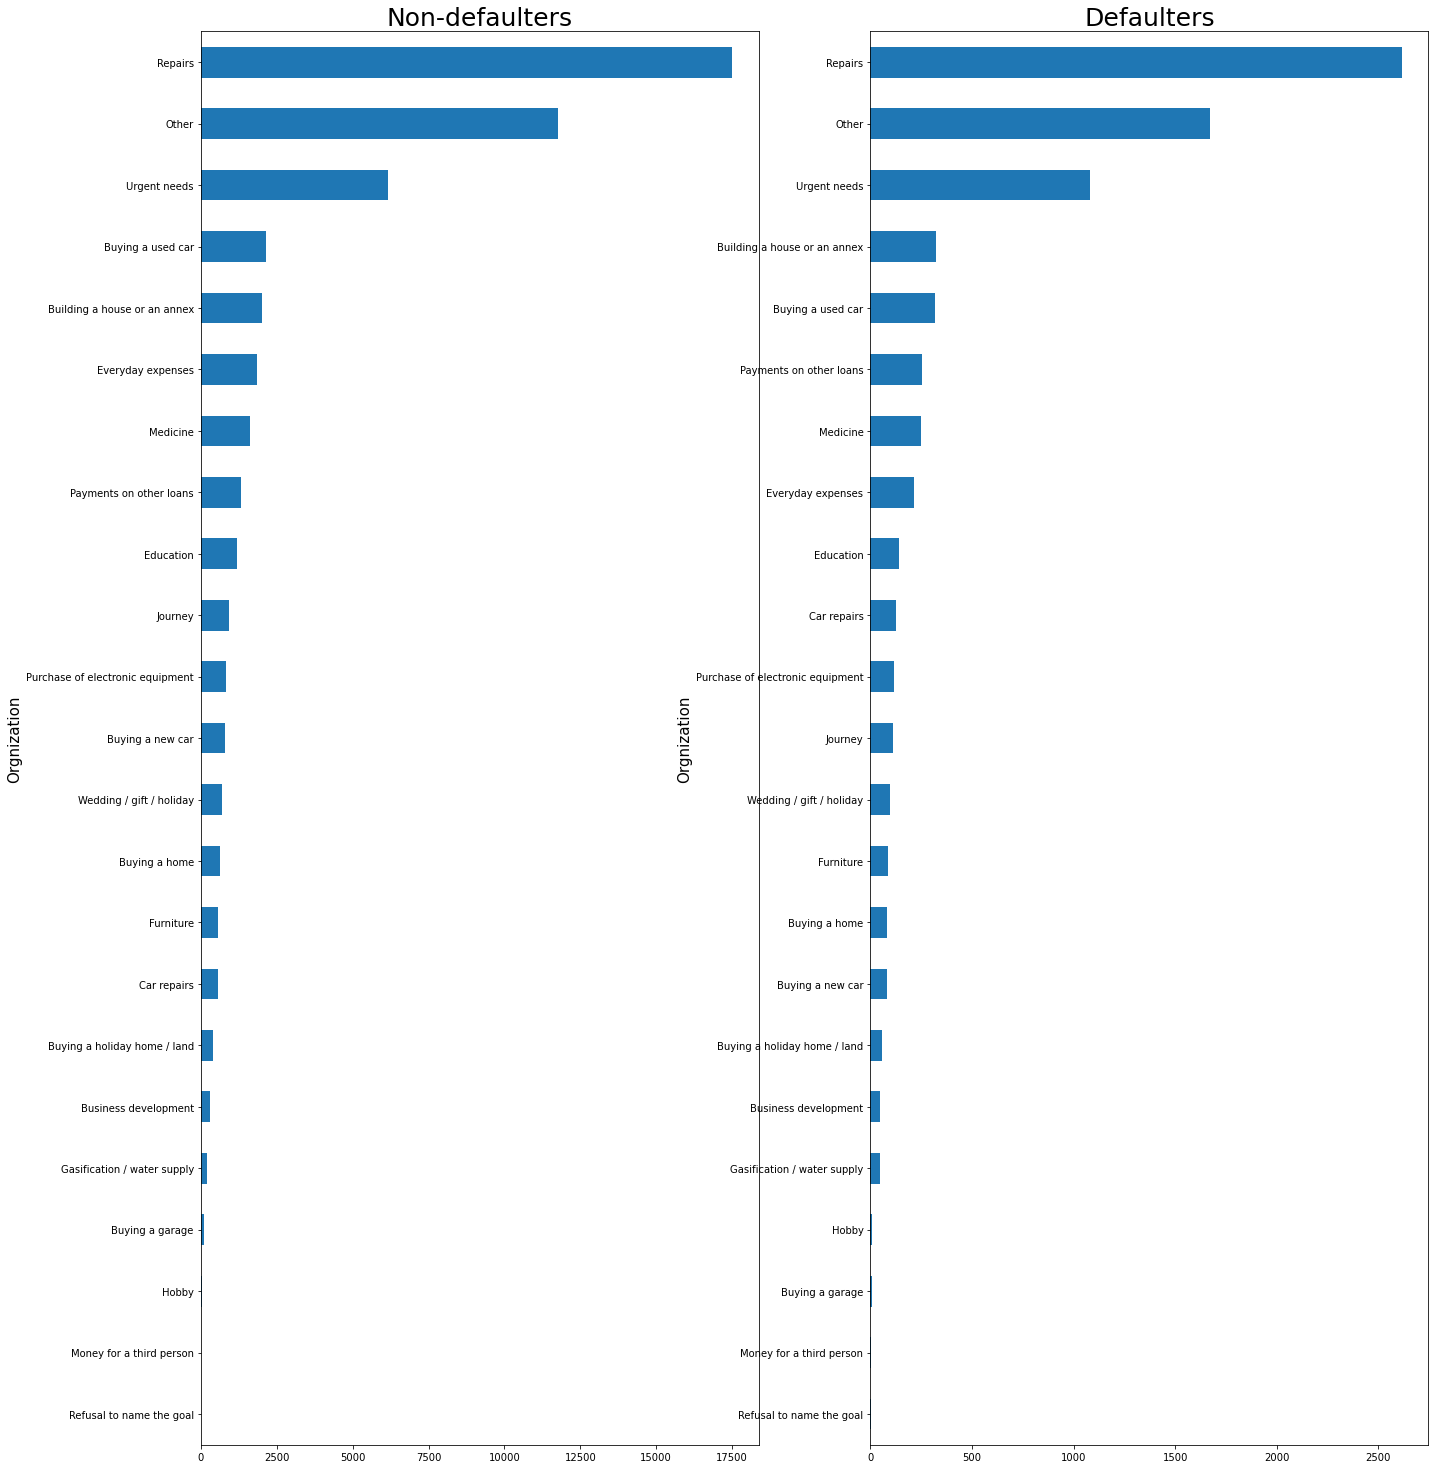

In [82]:
plt.figure(figsize=(22,26)) 
plt.subplot(121)
(data0.groupby(["NAME_CASH_LOAN_PURPOSE"])["TargetCount"].sum()).sort_values().plot.barh()
plt.title("Non-defaulters",fontsize=25)
plt.ylabel("Orgnization",fontsize=15)
plt.subplot(122)
(data1.groupby(["NAME_CASH_LOAN_PURPOSE"])["TargetCount"].sum()).sort_values().plot.barh()
plt.ylabel("Orgnization",fontsize=15)
plt.title("Defaulters",fontsize=25)
plt.show()

### Observation
#### Maximum clients who did repair work previously are defaulters

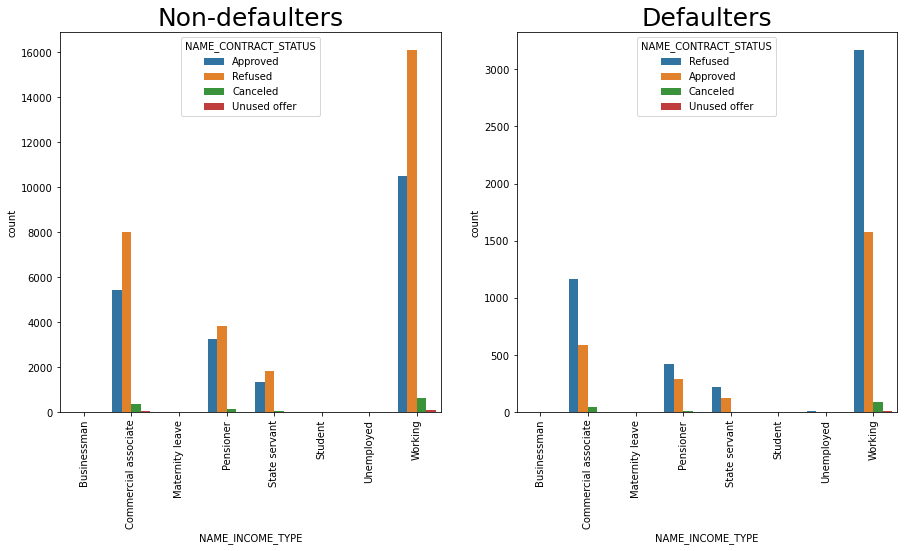

In [83]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(data = data0, x= "NAME_INCOME_TYPE",hue = "NAME_CONTRACT_STATUS")
plt.title("Non-defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(data = data1, x= "NAME_INCOME_TYPE",hue = "NAME_CONTRACT_STATUS")
plt.title("Defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.show()

### Observation

#### Maximum number of application are refused for Working clients with very high risk of default

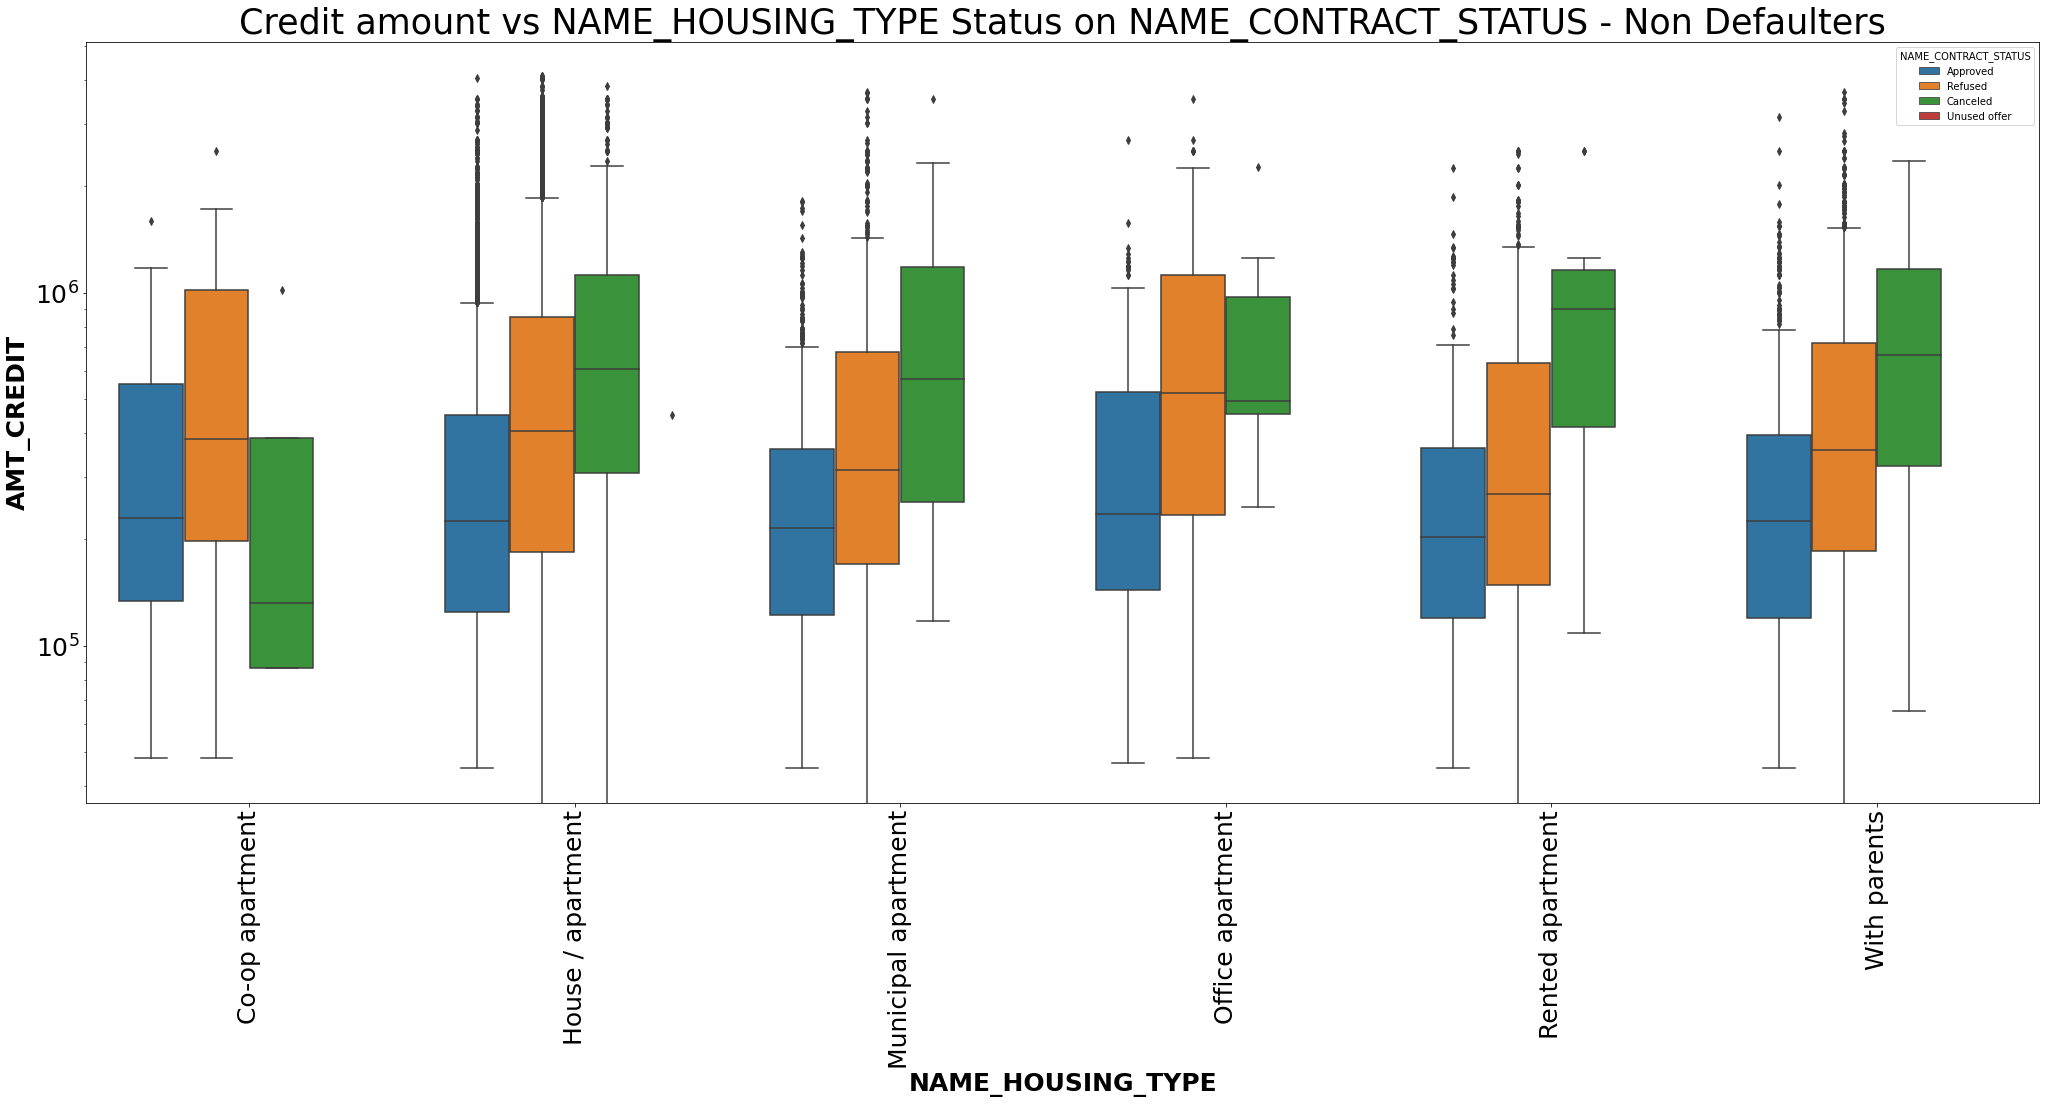

In [84]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.boxplot(data =data0, x='NAME_HOUSING_TYPE',y='AMT_CREDIT_prev',hue ='NAME_CONTRACT_STATUS')                                             #Adjusting legend position
plt.title('Credit amount vs NAME_HOUSING_TYPE Status on NAME_CONTRACT_STATUS - Non Defaulters',fontsize=35 )
plt.xlabel("NAME_HOUSING_TYPE",fontsize= 25, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 25, fontweight="bold")
plt.xticks(rotation=90, fontsize=25)
plt.yticks(rotation=360, fontsize=25)
plt.show()

### observation
#### House and Municipal partment clients has maximum number of refused and approved applicants with Outliers

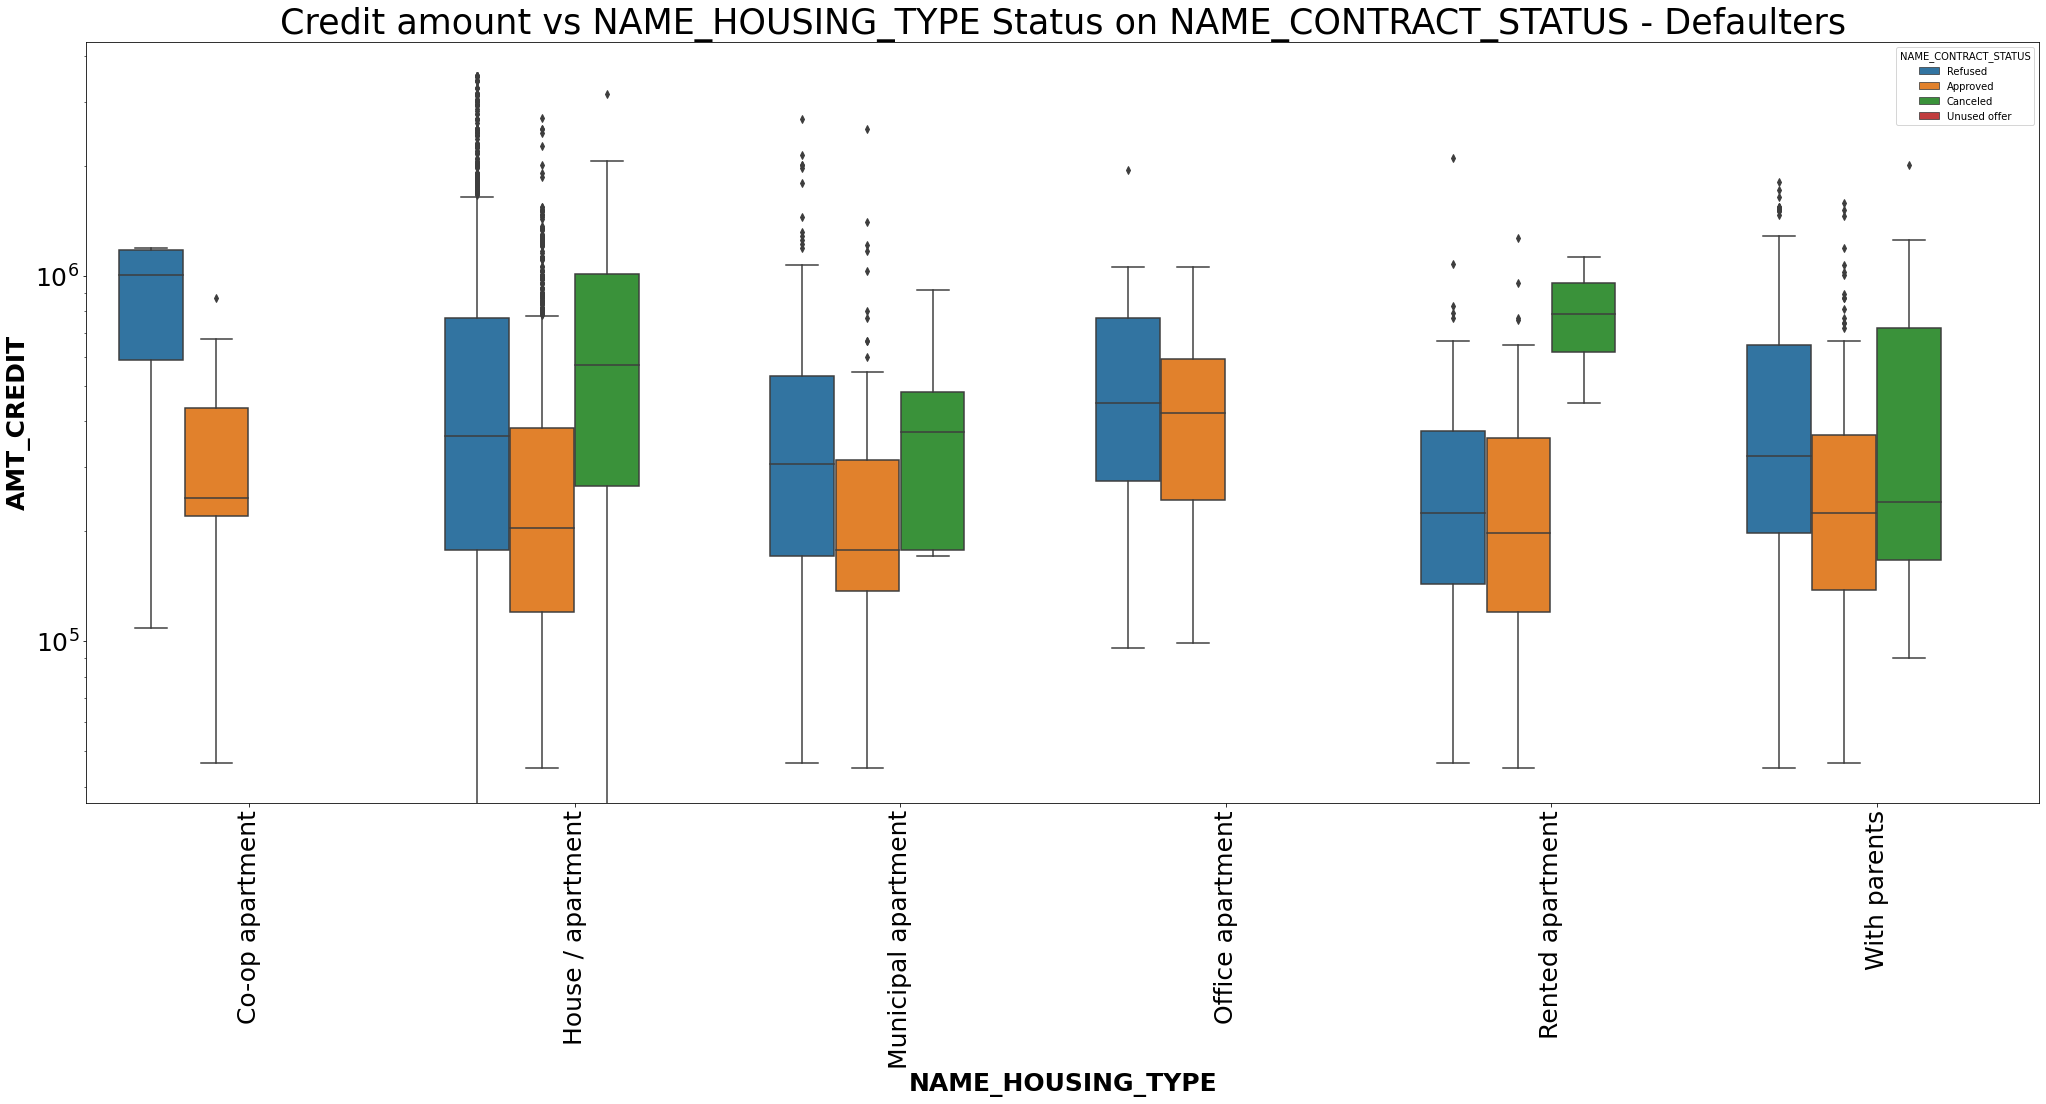

In [85]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.boxplot(data =data1, x='NAME_HOUSING_TYPE',y='AMT_CREDIT_prev',hue ='NAME_CONTRACT_STATUS')                                             #Adjusting legend position
plt.title('Credit amount vs NAME_HOUSING_TYPE Status on NAME_CONTRACT_STATUS - Defaulters',fontsize=35 )
plt.xlabel("NAME_HOUSING_TYPE",fontsize= 25, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 25, fontweight="bold")
plt.xticks(rotation=90, fontsize=25)
plt.yticks(rotation=360, fontsize=25)
plt.show()

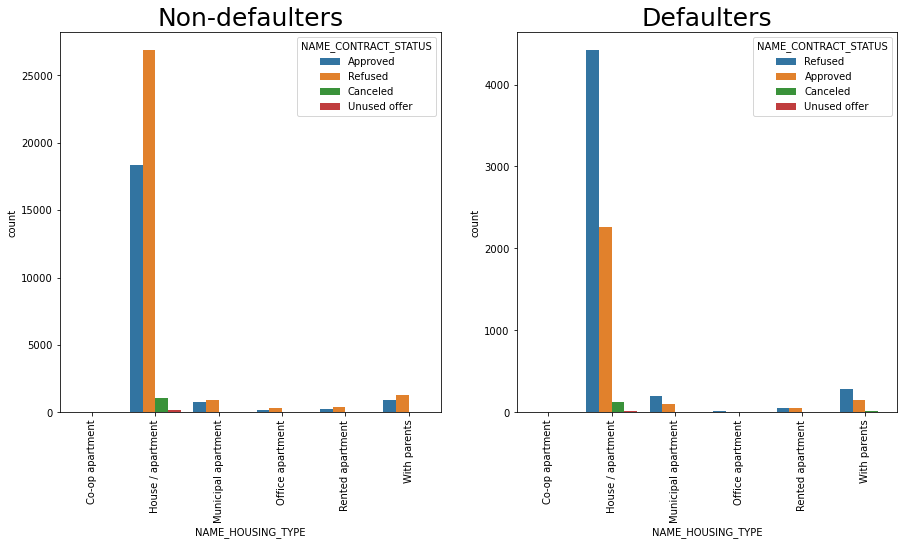

In [86]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(data = data0, x= "NAME_HOUSING_TYPE",hue = "NAME_CONTRACT_STATUS")
plt.title("Non-defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(data = data1, x= "NAME_HOUSING_TYPE",hue = "NAME_CONTRACT_STATUS")
plt.title("Defaulters",fontsize=25)
plt.xticks(rotation=90)
plt.show()

### Observation
#### Client living in house/ Apartment got maximum number of application refused and they are the high risk clients
#### Clients living with parents and in municipal or office apartment are relatively low risk clients


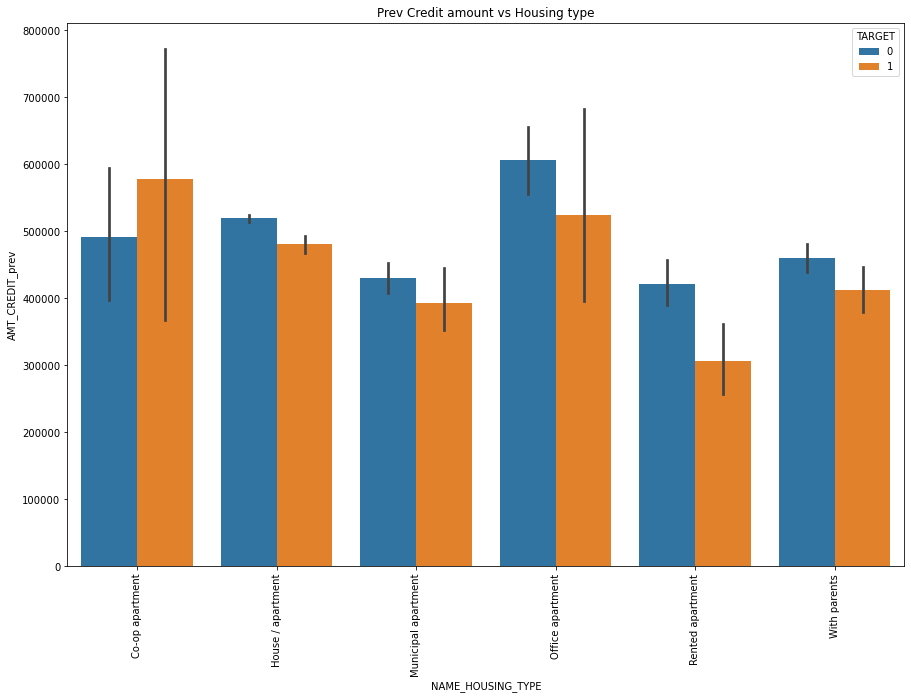

In [87]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(data = data, y='AMT_CREDIT_prev',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

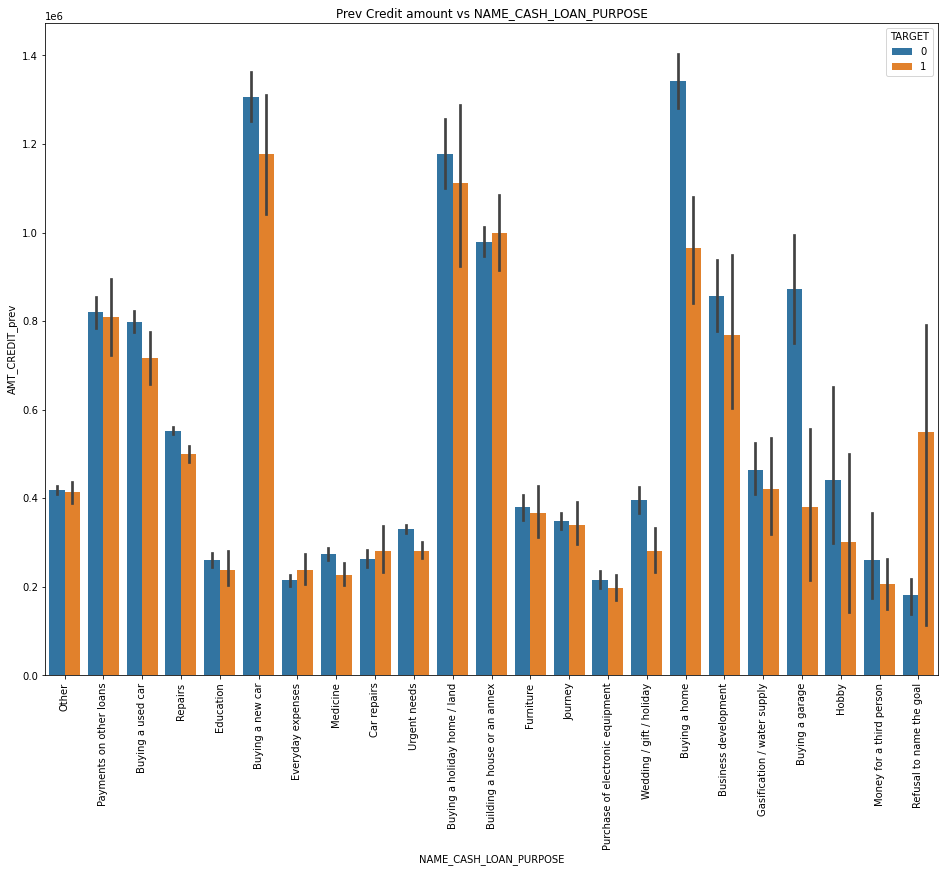

In [88]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data = data, y='AMT_CREDIT_prev',hue='TARGET',x='NAME_CASH_LOAN_PURPOSE')
plt.title('Prev Credit amount vs NAME_CASH_LOAN_PURPOSE')
plt.show()

### Observation
##### Client with building a house are the high risk clients who are mainly facing payment difficulties followed by refusal to the name goal
##### loan with the purpose of Buying a garageclients are paying emi on time comparing to others
##### Buying a new car, holiday home are also risky clients in terms of repayment.
##### Clients with cash purpose of Hobby are relatively less risk clients

CONCLUSION

1. Bank received maximum number of applications from INCOME_TYPE - Working clients, but looking at the data we can say that, working clients holds the maximum number of records in late payments, they are high risk clients which are likely to get default.
2. Very low-income clients are likely to get default easily so Bank should check credit approved amount and EMI while considering application for approval.
3. Client with single relationship are less risky to get default but married clients are applied the most with the high rate of late payments.
4. Clients with housing type "with Parents" and "Municipal apartment" are less risky so Bank should focus more on them.
5. Middle age clients having lot of paying difficulties but very young clients do not face any payment issues.
6. Loan purpose Repair is having high number of defaulters.
7. Previous credit mainly raised for buying new car, holiday home and house with high number of defaulters.
8. Previously 38.8% loans are approved, 2.3% are cancelled, 58.5% are Refused and 0.3% are Unused. Maximum number of application are refused for Working clients.
9. Bank can focus more on Pensioner, Students, State Servant and Businessman clients. Can asked high ROI or EMI for clients with middle or high risk and offer low ROI for the low risk , well educated, non-defaulters , young and middle to high income clients.
